# EDA of the ASAP-Review Dataset

In [1]:
from google.colab import drive
# Retry mounting Google Drive
try:
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive mounted successfully!")
except ValueError as e:
    print(f"Mount failed: {e}. Please try re-running this cell.")

Mounted at /content/drive
Google Drive mounted successfully!


In [2]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

# Configure styles
sns.set(style='whitegrid', font_scale=1.2)

# Base dataset directory (adjust if needed)
DATASET_DIR = '/content/drive/MyDrive/1 METU/7/IS 584 – Deep Learning for Text Analytics/project/dataset'


In [3]:
!pip install tqdm

%matplotlib inline
sns.set(style='whitegrid', font_scale=1.2)


In [4]:
import wandb
import os

# Set your W&B API key - Add your API key here or use environment variable
# os.environ["WANDB_API_KEY"] = "your_api_key_here"

# os.environ["WANDB_MODE"] = "offline"

wHICH FOLDERS ARE THERE

### Exploring Conference Subdirectories

Next we want to confirm the structure under each conference folder (e.g. `ICLR_2017_paper`, `ICLR_2017_review`, etc.). Rather than hard-coding each year, we can:

1. Dynamically collect all top-level folders starting with `ICLR_` or `NIPS_`.  
2. Loop through them and list their immediate children.  
3. Print the results in a readable way.  

This approach scales automatically if we add more conferences in the future.


In [5]:
for entry in os.listdir(DATASET_DIR):
    print("-", entry)

- README.md
- aspect_data
- ICLR_2017
- ICLR_2018
- ICLR_2019
- ICLR_2020
- NIPS_2016
- NIPS_2017
- NIPS_2018
- NIPS_2019


In [6]:
conf = 'ICLR_2017'
conf_path = os.path.join(DATASET_DIR, conf)
print("Inside", conf, ":", os.listdir(conf_path))

conf = 'ICLR_2018'
conf_path = os.path.join(DATASET_DIR, conf)
print("Inside", conf, ":", os.listdir(conf_path))

conf = 'NIPS_2016'
conf_path = os.path.join(DATASET_DIR, conf)
print("Inside", conf, ":", os.listdir(conf_path))

conf = 'NIPS_2017'
conf_path = os.path.join(DATASET_DIR, conf)
print("Inside", conf, ":", os.listdir(conf_path))


Inside ICLR_2017 : ['ICLR_2017_content', 'ICLR_2017_paper', 'ICLR_2017_review']
Inside ICLR_2018 : ['ICLR_2018_content', 'ICLR_2018_paper', 'ICLR_2018_review']
Inside NIPS_2016 : ['NIPS_2016_content', 'NIPS_2016_paper', 'NIPS_2016_review']
Inside NIPS_2017 : ['NIPS_2017_content', 'NIPS_2017_paper', 'NIPS_2017_review']


In [7]:
all_entries = os.listdir(DATASET_DIR)
confs = [d for d in all_entries if d.startswith(('ICLR_', 'NIPS_'))]

for conf in sorted(confs):
    conf_path = os.path.join(DATASET_DIR, conf)
    # List only subdirectories (paper, review, content)
    subdirs = [name for name in os.listdir(conf_path)
               if os.path.isdir(os.path.join(conf_path, name))]
    print(f"Inside {conf}: {subdirs}")

Inside ICLR_2017: ['ICLR_2017_content', 'ICLR_2017_paper', 'ICLR_2017_review']
Inside ICLR_2018: ['ICLR_2018_content', 'ICLR_2018_paper', 'ICLR_2018_review']
Inside ICLR_2019: ['ICLR_2019_content', 'ICLR_2019_paper', 'ICLR_2019_review']
Inside ICLR_2020: ['ICLR_2020_content', 'ICLR_2020_paper', 'ICLR_2020_review']
Inside NIPS_2016: ['NIPS_2016_content', 'NIPS_2016_paper', 'NIPS_2016_review']
Inside NIPS_2017: ['NIPS_2017_content', 'NIPS_2017_paper', 'NIPS_2017_review']
Inside NIPS_2018: ['NIPS_2018_content', 'NIPS_2018_paper', 'NIPS_2018_review']
Inside NIPS_2019: ['NIPS_2019_content', 'NIPS_2019_paper', 'NIPS_2019_review']


### 2. Inspect One Conference in Detail

Now that we see each `conf` has the expected `_paper` and `_review` subfolders, pick one (e.g. `ICLR_2017`) and drill down into the paper directory. We'll list a few filenames and examine a single JSON to understand its keys.


In [8]:
# Choose one conference to inspect
conf = 'ICLR_2017'
conf_path = os.path.join(DATASET_DIR, conf)

# Show its subfolders to verify
print(f"Inside {conf}: {os.listdir(conf_path)}")

Inside ICLR_2017: ['ICLR_2017_content', 'ICLR_2017_paper', 'ICLR_2017_review']


In [9]:
# Path to its paper folder
paper_dir = os.path.join(conf_path, f"{conf}_paper")
files = os.listdir(paper_dir)

# Print the total count and a few example filenames
print(f"Found {len(files)} files; e.g.:", files[:5])

# Pick the first file and load it to inspect its structure
fn = files[0]
print("Sample filename:", fn)

Found 489 files; e.g.: ['ICLR_2017_395_paper.json', 'ICLR_2017_281_paper.json', 'ICLR_2017_142_paper.json', 'ICLR_2017_31_paper.json', 'ICLR_2017_175_paper.json']
Sample filename: ICLR_2017_395_paper.json


In [10]:
# Load the JSON metadata for one paper
sample = json.load(open(os.path.join(paper_dir, fn), 'r', encoding='utf-8'))

# Display the top‐level keys and a few fields
print("Keys in JSON:", sample.keys())
print("  id     :", sample['id'])
print("  title  :", sample['title'][:80], "…")
print("  authors:", sample['authors'])

Keys in JSON: dict_keys(['id', 'conference', 'decision', 'url', 'hasContent', 'hasReview', 'title', 'authors'])
  id     : ICLR_2017_395
  title  : RL^2: Fast Reinforcement Learning via Slow Reinforcement Learning …
  authors: ['Yan Duan', 'John Schulman', 'Xi Chen', 'Peter L. Bartlett', 'Ilya Sutskever', 'Pieter Abbeel']


Each paper JSON contains id, conference, decision, hasReview, hasContent, title, authors. confirming what metadata we'll later load into our DataFrame.

#### `load_one_conference_papers(conf)`

This function reads **all paper metadata JSONs** for a given conference folder:
1. Constructs the path,  
2. Iterates over every file ending in `_paper.json`.  
3. Parses each JSON into a Python dict and appends it to a list.  
4. Returns the full list of paper dicts for downstream analysis.

In [11]:
def load_one_conference_papers(conf):
    papers = []  # will hold all paper metadata dicts
    # Path to the paper folder for this conference
    paper_dir = os.path.join(DATASET_DIR, conf, f"{conf}_paper")

    # Loop through every file in that folder
    for fn in os.listdir(paper_dir):
        # Only process metadata JSONs
        if fn.endswith('_paper.json'):
            path = os.path.join(paper_dir, fn)
            # Load the JSON into a dict
            with open(path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            papers.append(data)

    return papers

# Test: load papers for ICLR_2017
papers = load_one_conference_papers('ICLR_2017')
print("Loaded paper count:", len(papers))

Loaded paper count: 489


#### `load_one_conference_reviews(conf)`

This function reads **all review‐object JSONs** for a given conference:
1. Targets the `<conf>_review/` folder.  
2. Selects files ending in `_review.json`.  
3. Parses and collects each review object (which contains the list of individual reviews and metaReview).

In [12]:
def load_one_conference_reviews(conf):
    reviews = []  # will gather all raw review‐object dicts
    review_dir = os.path.join(DATASET_DIR, conf, f"{conf}_review")

    for fn in os.listdir(review_dir):
        # Only JSON files representing review objects
        if fn.endswith('_review.json'):
            path = os.path.join(review_dir, fn)
            with open(path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            reviews.append(data)

    return reviews

# Quick test: load reviews for ICLR_2017
reviews = load_one_conference_reviews('ICLR_2017')
print("Loaded review‐objects count:", len(reviews))

Loaded review‐objects count: 490


#### `load_all()`

This function loops through every conference folder (`ICLR_*` and `NIPS_*`):
1. Calls `load_one_conference_papers` and `load_one_conference_reviews` for each.  
2. Concatanates and extends two master lists: `all_papers` and `all_reviews`.  
3. Converts `all_papers` into a `pandas.DataFrame` for easy EDA.  
4. Returns `(papers_df, all_reviews)`.
5. We’re loading two different kinds of objects:

a. Paper metadata → goes into all_papers.:

b. Review objects → goes into all_reviews.

In [13]:
'''def load_all():
    all_papers, all_reviews = [], []

    # Automatically detect conference folders
    for d in os.listdir(DATASET_DIR):
        if d.startswith(('ICLR_', 'NIPS_')):
            # Load papers and reviews for this conference
            ps = load_one_conference_papers(d)
            rs = load_one_conference_reviews(d)
            all_papers.extend(ps)
            all_reviews.extend(rs)

    # Convert paper list into a DataFrame
    papers_df = pd.DataFrame(all_papers)
    return papers_df, all_reviews

# Execute and verify totals
papers_df, reviews_raw = load_all()
print(f"Total papers: {len(papers_df)}, total review-objects: {len(reviews_raw)}")

# Checks
print(papers_df.head(2).T)        # first 2 papers, Transposed for readability
# reviews_raw is a list of dicts; each dict should have keys 'id' and 'reviews'
print("Review object example keys:", reviews_raw[0].keys())


# Confirm data types of our two main variables
print("\nType checks:")
print("  papers_df is a", type(papers_df))
print("  reviews_raw is a", type(reviews_raw))

# Confirm the full range
print(f"\nTotal papers: {len(papers_df)}, showing bottom 2 rows:")
print(papers_df.tail(2))

'''

'def load_all():\n    all_papers, all_reviews = [], []\n\n    # Automatically detect conference folders\n    for d in os.listdir(DATASET_DIR):\n        if d.startswith((\'ICLR_\', \'NIPS_\')):\n            # Load papers and reviews for this conference\n            ps = load_one_conference_papers(d)\n            rs = load_one_conference_reviews(d)\n            all_papers.extend(ps)\n            all_reviews.extend(rs)\n\n    # Convert paper list into a DataFrame\n    papers_df = pd.DataFrame(all_papers)\n    return papers_df, all_reviews\n\n# Execute and verify totals\npapers_df, reviews_raw = load_all()\nprint(f"Total papers: {len(papers_df)}, total review-objects: {len(reviews_raw)}")\n\n# Checks\nprint(papers_df.head(2).T)        # first 2 papers, Transposed for readability\n# reviews_raw is a list of dicts; each dict should have keys \'id\' and \'reviews\'\nprint("Review object example keys:", reviews_raw[0].keys())\n\n\n# Confirm data types of our two main variables\nprint("\nType c

### While it was possible to use review_raw for the analysis, thinking that creating a dataframe would be useful for future use, I wanted to create a dataframe from the raw set, and for its creation I asked chatgpt a lot. However, for the llm usage, dataframe was not a prerequisite, as it could comprehend with jsonl format, but I think, I could highlight more important parts(like review rate/confidence score which were just in a subset of the reviews, but actually more important then some other columns), and this is considered to be helping the LLM to comprehend better.

In [14]:
'''# 1) Defining extract_review_data()
import re
from tqdm import tqdm

def extract_review_data(raw_reviews):
    """
    Flatten the list of review‐object dicts (reviews_raw)
    into a pandas DataFrame of individual reviews.
    """
    records = []
    for obj in tqdm(raw_reviews, desc="Extracting reviews"):
        pid = obj.get('id', '')
        # Regular reviews (each reviewer’s comment)
        for i, rev in enumerate(obj.get('reviews', [])):
            text = rev.get('review', '').strip()
            # Extract numeric rating & confidence via regex
            rating_match     = re.search(r'(\d+)', rev.get('rating', ''))
            confidence_match = re.search(r'(\d+)', rev.get('confidence', ''))
            records.append({
                'paper_id': pid,
                'review_type': 'regular',
                'review_idx': i,
                'review_text': text,
                'numeric_rating': int(rating_match.group(1)) if rating_match else None,
                'numeric_confidence': int(confidence_match.group(1)) if confidence_match else None,
                'review_length': len(text.split())
            })
        # Meta‐review (area‐chair summary)
        if obj.get('metaReview'):
            mr = obj['metaReview'].strip()
            records.append({
                'paper_id': pid,
                'review_type': 'meta',
                'review_idx': -1,
                'review_text': mr,
                'numeric_rating': None,
                'numeric_confidence': None,
                'review_length': len(mr.split())
            })
    # Convert to DataFrame
    import pandas as pd
    return pd.DataFrame(records)

# 2) Create reviews_df from the reviews_raw list
reviews_df = extract_review_data(reviews_raw)

# Quick sanity check
print("Number of raw review-objects:", len(reviews_raw))
print("Flattened reviews_df shape    :", reviews_df.shape)
reviews_df.head(3)'''

'# 1) Defining extract_review_data() \nimport re\nfrom tqdm import tqdm\n\ndef extract_review_data(raw_reviews):\n    """\n    Flatten the list of review‐object dicts (reviews_raw)\n    into a pandas DataFrame of individual reviews.\n    """\n    records = []\n    for obj in tqdm(raw_reviews, desc="Extracting reviews"):\n        pid = obj.get(\'id\', \'\')\n        # Regular reviews (each reviewer’s comment)\n        for i, rev in enumerate(obj.get(\'reviews\', [])):\n            text = rev.get(\'review\', \'\').strip()\n            # Extract numeric rating & confidence via regex\n            rating_match     = re.search(r\'(\\d+)\', rev.get(\'rating\', \'\'))\n            confidence_match = re.search(r\'(\\d+)\', rev.get(\'confidence\', \'\'))\n            records.append({\n                \'paper_id\': pid,\n                \'review_type\': \'regular\',\n                \'review_idx\': i,\n                \'review_text\': text,\n                \'numeric_rating\': int(rating_match.gr

### Here we see the papers_df has 8 columns (id, conference, decision, url, hasContent, hasReview, title, authors).

In [15]:
'''import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style='whitegrid')

# 1) Reviews-per-paper distribution
# Only count “regular” reviews
rpp = reviews_df[reviews_df['review_type']=='regular'] \
         .groupby('paper_id').size()

print("Reviews per paper summary:")
print(rpp.describe())

plt.figure(figsize=(6,4))
sns.histplot(rpp, bins=range(1, rpp.max()+2), discrete=True)
plt.title("Number of Regular Reviews per Paper")
plt.xlabel("Reviews per Paper")
plt.ylabel("Count of Papers")
plt.show()


# 2) Rating vs. Final Decision
# Merge regular reviews with the paper decision
merged = (reviews_df[reviews_df['review_type']=='regular']
           .merge(papers_df[['id','decision']],
                  left_on='paper_id', right_on='id',
                  how='left'))

plt.figure(figsize=(6,4))
sns.boxplot(x='decision', y='numeric_rating', data=merged)
plt.xticks(rotation=45)
plt.title("Reviewer Rating by Final Decision")
plt.xlabel("Final Decision")
plt.ylabel("Numeric Rating")
plt.show()


# 3) Confidence vs. Rating
plt.figure(figsize=(6,4))
sns.jointplot(
    data=merged, x='numeric_rating', y='numeric_confidence',
    kind='hex', height=6
)
plt.suptitle("Rating vs. Reviewer Confidence", y=1.02)
plt.show()'''

'import matplotlib.pyplot as plt\nimport seaborn as sns\nfrom wordcloud import WordCloud\n\nsns.set(style=\'whitegrid\')\n\n# 1) Reviews-per-paper distribution\n# Only count “regular” reviews\nrpp = reviews_df[reviews_df[\'review_type\']==\'regular\']          .groupby(\'paper_id\').size()\n\nprint("Reviews per paper summary:")\nprint(rpp.describe())\n\nplt.figure(figsize=(6,4))\nsns.histplot(rpp, bins=range(1, rpp.max()+2), discrete=True)\nplt.title("Number of Regular Reviews per Paper")\nplt.xlabel("Reviews per Paper")\nplt.ylabel("Count of Papers")\nplt.show()\n\n\n# 2) Rating vs. Final Decision\n# Merge regular reviews with the paper decision\nmerged = (reviews_df[reviews_df[\'review_type\']==\'regular\']\n           .merge(papers_df[[\'id\',\'decision\']],\n                  left_on=\'paper_id\', right_on=\'id\',\n                  how=\'left\'))\n\nplt.figure(figsize=(6,4))\nsns.boxplot(x=\'decision\', y=\'numeric_rating\', data=merged)\nplt.xticks(rotation=45)\nplt.title("Review

# START FROM HERE FOR FUTURE TRIALS

In [16]:
def load_conference_data(conf):
    papers, reviews = [], []
    base = os.path.join(DATASET_DIR, conf)
    # papers
    for fn in os.listdir(os.path.join(base, conf + '_paper')):
        if fn.endswith('_paper.json'):
            papers.append(json.load(open(os.path.join(base, conf + '_paper', fn), 'r')))
    # reviews
    for fn in os.listdir(os.path.join(base, conf + '_review')):
        if fn.endswith('_review.json'):
            reviews.append(json.load(open(os.path.join(base, conf + '_review', fn), 'r')))
    return papers, reviews

def load_all():
    all_p, all_r = [], []
    for d in os.listdir(DATASET_DIR):
        if d.startswith(('ICLR_','NIPS_')):
            p, r = load_conference_data(d)
            all_p += p; all_r += r
    return pd.DataFrame(all_p), all_r

papers_df, reviews_raw = load_all()
print(f"Loaded {len(papers_df)} papers and {len(reviews_raw)} review-objects")

Loaded 8877 papers and 8780 review-objects


In [17]:
print(">>> papers_df shape:", papers_df.shape)
print(">>> papers_df type:",type(papers_df))
print("\nFirst 3 rows of papers_df:")
display(papers_df.head(3))

>>> papers_df shape: (8877, 8)
>>> papers_df type: <class 'pandas.core.frame.DataFrame'>

First 3 rows of papers_df:


,id,conference,decision,url,hasContent,hasReview,title,authors
0,ICLR_2017_395,ICLR,Reject,http://openreview.net/pdf/c1cfee5be26dee2679a1...,true,true,RL^2: Fast Reinforcement Learning via Slow Rei...,"[Yan Duan, John Schulman, Xi Chen, Peter L. Ba..."
1,ICLR_2017_281,ICLR,Reject,http://openreview.net/pdf/2f13fb612ef82e430be7...,true,true,A Joint Many-Task Model: Growing a Neural Netw...,"[Kazuma Hashimoto, Caiming Xiong, Yoshimasa Ts..."
2,ICLR_2017_142,ICLR,Accept (Poster),http://openreview.net/pdf/1b6c5951af988d823360...,true,true,Automatic Rule Extraction from Long Short Term...,"[W. James Murdoch, Arthur Szlam]"


In [18]:
print(">>> reviews_raw type:",type(reviews_raw))
print("\nFirst 3 elements of reviews_raw:")
# Display the first 3 elements of the list
for i in range(min(3, len(reviews_raw))):
    print(reviews_raw[i])

>>> reviews_raw type: <class 'list'>

First 3 elements of reviews_raw:
{'id': 'ICLR_2017_335', 'reviews': [{'review': 'The paper is about channel sparsity in Convolution layer.\nThe paper is well written and it elaborately discussed and investigated different approaches for applying sparsity.  The paper contains detailed literature review.\nIn result section, it showed the approach gives good results using 60% sparsity with reducing number of parameters, which can be useful in some embedded application with limited resource i.e. mobile devices.\nThe main point is that the paper needs more detailed investigation on different dropout schedule.\nAs mentioned implementation details section, they deactivate the connections by applying masks to parameter tensors, which is not helpful in speeding up the training and computation in convolution layer. They can optimize implementation to reduce computation time.\n', 'rating': '7: Good paper, accept', 'confidence': '3: The reviewer is fairly conf

In [19]:
# While the indicidual tests were implemented one by one like above, to give a concise overview, gpt was used
print(f"\n>>> reviews_raw is a list of {len(reviews_raw)} review‐objects\n")
for i, rev_obj in enumerate(reviews_raw[:3]):
    print(f"reviews_raw[{i}] keys:", list(rev_obj.keys()))
    num_regs = len(rev_obj.get('reviews', []))
    print(f"  → Contains {num_regs} regular reviews")
    if num_regs > 0:
        # show first review’s rating/confidence
        first = rev_obj['reviews'][0]
        print("    sample rating :", first.get('rating'))
        print("    sample confidence:", first.get('confidence'))
    # show a snippet of the metaReview if it exists
    if 'metaReview' in rev_obj:
        snippet = rev_obj['metaReview'][:80].replace('\n',' ')
        print("    metaReview snippet:", snippet, "…")
    print()


>>> reviews_raw is a list of 8780 review‐objects

reviews_raw[0] keys: ['id', 'reviews']
  → Contains 3 regular reviews
    sample rating : 7: Good paper, accept
    sample confidence: 3: The reviewer is fairly confident that the evaluation is correct

reviews_raw[1] keys: ['id', 'reviews']
  → Contains 3 regular reviews
    sample rating : 7: Good paper, accept
    sample confidence: 4: The reviewer is confident but not absolutely certain that the evaluation is correct

reviews_raw[2] keys: ['id', 'reviews']
  → Contains 3 regular reviews
    sample rating : 7: Good paper, accept
    sample confidence: 5: The reviewer is absolutely certain that the evaluation is correct and very familiar with the relevant literature



- **`load_conference_data`**  
  Here a conference string (e.g. `"ICLR_2017"`), returns two Python lists:
  1. **`papers`** – a list of dicts, one per `*_paper.json` file.  
  2. **`reviews`** – a list of dicts, one per `*_review.json` file.

- **`load_all`**  
  A Python function:
  1. Scans `DATASET_DIR` for every `ICLR_*` and `NIPS_*` folder.  
  2. Calls `load_conference_data` for each, concatenating the results.  
  3. Returns two objects (in this order):
     - **`papers_df`** – a `pandas.DataFrame` built from all paper metadata dicts.  
     - **`reviews_raw`** – a flat Python list of all review-object dicts.

- **`papers_df`**  
  A DataFrame with one row per paper, containing columns such as: id, conference, decision, url, hasContent, hasReview, title, author

# 4. Expand Reviews into a DataFrame

In [20]:
obj = reviews_raw[0]
print(obj.keys())

dict_keys(['id', 'reviews'])


In [21]:
rev_list = obj.get('reviews', [])
print(f"Number of regular reviews in this paper: {len(rev_list)}")
print("Example review entry:", rev_list[0])

Number of regular reviews in this paper: 3
Example review entry: {'review': 'The paper is about channel sparsity in Convolution layer.\nThe paper is well written and it elaborately discussed and investigated different approaches for applying sparsity.  The paper contains detailed literature review.\nIn result section, it showed the approach gives good results using 60% sparsity with reducing number of parameters, which can be useful in some embedded application with limited resource i.e. mobile devices.\nThe main point is that the paper needs more detailed investigation on different dropout schedule.\nAs mentioned implementation details section, they deactivate the connections by applying masks to parameter tensors, which is not helpful in speeding up the training and computation in convolution layer. They can optimize implementation to reduce computation time.\n', 'rating': '7: Good paper, accept', 'confidence': '3: The reviewer is fairly confident that the evaluation is correct'}


Each entry in `rev_list` is itself a dict with keys:
- `review`     → the full review text  
- `rating`     → e.g. "7: Good paper, accept"  
- `confidence` → e.g. "3: The reviewer is fairly confident..."

In [22]:
sample = rev_list[0]
print("Text      :", sample['review'][:80], "…")
print("Rating str:", sample['rating'])
print("Conf str  :", sample['confidence'])

Text      : The paper is about channel sparsity in Convolution layer.
The paper is well writ …
Rating str: 7: Good paper, accept
Conf str  : 3: The reviewer is fairly confident that the evaluation is correct


The `rating` and `confidence` fields include both a numeric level and descriptive text.  
We only need the numeric portion, so we’ll extract digits via regex.

In [23]:
import re
match_rating = re.search(r'(\d+)', sample['rating'])
match_conf   = re.search(r'(\d+)', sample['confidence'])
print("Numeric rating   →", match_rating.group(1))
print("Numeric confidence→", match_conf.group(1))

Numeric rating   → 7
Numeric confidence→ 3


In [24]:
rows = []
for obj in reviews_raw[:5]:                 # test on first 5 papers
    pid = obj['id']
    for i, rev in enumerate(obj.get('reviews', [])):
        text = rev.get('review','')
        # parse numeric rating / confidence
        m_r = re.search(r'(\d+)', rev.get('rating',''))
        m_c = re.search(r'(\d+)', rev.get('confidence',''))
        rows.append({
            'paper_id': pid,
            'type': 'regular',
            'review_idx': i,
            'text': text,
            'rating': int(m_r.group(1)) if m_r else None,
            'confidence': int(m_c.group(1)) if m_c else None,
            'length': len(text.split())
        })

import pandas as pd
test_df = pd.DataFrame(rows)
print(test_df.head())

        paper_id     type  review_idx  \
0  ICLR_2017_335  regular           0   
1  ICLR_2017_335  regular           1   
2  ICLR_2017_335  regular           2   
3  ICLR_2017_257  regular           0   
4  ICLR_2017_257  regular           1   

                                                text  rating  confidence  \
0  The paper is about channel sparsity in Convolu...       7           3   
1  This paper aims to improve efficiency of convo...       5           4   
2  The paper experiments with channel to channel ...       4           4   
3  This paper investigates the impact of orthogon...       7           4   
4  The paper is well-motivated, and is part of a ...       5           4   

   length  
0     115  
1     265  
2     138  
3     573  
4     331  


In [25]:
# Extended with gpt
# 1) Prepare an empty list to collect each review record
rows = []

# 2) Iterate over the first 5 review‐objects as a test
for obj in reviews_raw:
    paper_id = obj['id']  # paper identifier

    # 3) Loop through each regular review in this object
    for idx, rev in enumerate(obj.get('reviews', [])):
        # Get the review text (strip leading/trailing whitespace)
        text = rev.get('review', '').strip()

        # 4) Extract the numeric rating via regex
        m_r = re.search(r'(\d+)', rev.get('rating', ''))
        rating = int(m_r.group(1)) if m_r else None

        # 5) Extract the numeric confidence via regex
        m_c = re.search(r'(\d+)', rev.get('confidence', ''))
        confidence = int(m_c.group(1)) if m_c else None

        # 6) Append a new record dict to our rows list
        rows.append({
            'paper_id':           paper_id,
            'review_type':        'regular',
            'review_idx':         idx,
            'review_text':        text,
            'numeric_rating':     rating,
            'numeric_confidence': confidence,
            'review_length':      len(text.split())
        })

# 7) Convert the list of dicts into a pandas DataFrame
reviews_df = pd.DataFrame(rows)

# 8) Quick check of the result
print(f"reviews_df shape: {reviews_df.shape}")
reviews_df.head(3)
print("Meta‐review sample:", obj.get('metaReview', '')[:100], "…")

if obj.get('metaReview'):
    m = obj['metaReview']
    rows.append({
        'paper_id': pid,
        'type': 'meta',
        'review_idx': -1,
        'text': m,
        'rating': None,
        'confidence': None,
        'length': len(m.split())
    })

reviews_df shape: (28122, 7)
Meta‐review sample: The reviewers consider the task suite, the memory-augmented model, and the evaluations to be solid c …


## Here the dictionarys review and confidence notes needed to be extracted, and it was important, maybe more important than the text, so we created two related columns that are also thought to be useful for LLM. For the tfidf, or even the previous trials of BERT, I might have used only the text part of the reviews dictionary combined with the extracted column of RATING and CONFIDENCE. But I planned to feed the RAG with the concatanated string of them  to help it to understand.

In [26]:
import re
from tqdm import tqdm
import pandas as pd

def extract_reviews_with_raw_scores(raw_reviews): # Changed function name to avoid conflict
    """
    Flatten a list of review-object dicts into a tabular DataFrame,
    including the raw string scores.
    """
    rows = []

    for obj in tqdm(raw_reviews, desc='Extracting reviews'):
        paper_id = obj.get('id', '')

        # --- 1) Regular reviews ---
        for review_idx, rev in enumerate(obj.get('reviews', [])):
            # Raw text of the review
            text = rev.get('review', '').strip()
            # Get the original rating and confidence strings
            raw_rating_str = rev.get('rating', '')
            raw_confidence_str = rev.get('confidence', '')

            # Extract numeric rating via regex (as before)
            m_r = re.search(r'(\d+)', raw_rating_str) # Use the extracted string
            numeric_rating = int(m_r.group(1)) if m_r else None

            # Extract numeric confidence via regex (as before)
            m_c = re.search(r'(\d+)', raw_confidence_str) # Use the extracted string
            numeric_confidence = int(m_c.group(1)) if m_c else None

            # Append a new record dict to our rows list
            rows.append({
                'paper_id':           paper_id,
                'review_type':        'regular',
                'review_idx':         review_idx,
                'review_text':        text,
                'raw_rating_string':  raw_rating_str,       # <= Added original rating string
                'numeric_rating':     numeric_rating,
                'raw_confidence_string': raw_confidence_str, # <= Added original confidence string
                'numeric_confidence': numeric_confidence,
                'review_length':      len(text.split())
            })

        # --- 2) Meta-review (optional) ---
        if obj.get('metaReview'):
            meta_text = obj['metaReview'].strip()
            rows.append({
                'paper_id':           paper_id,
                'review_type':        'meta',
                'review_idx':         -1,
                'review_text':        meta_text,
                'raw_rating_string':  None, # Meta-reviews typically don't have these
                'numeric_rating':     None,
                'raw_confidence_string': None, # Meta-reviews typically don't have these
                'numeric_confidence': None,
                'review_length':      len(meta_text.split())
            })

    return pd.DataFrame(rows)

# Run the modified extractor
reviews_df = extract_reviews_with_raw_scores(reviews_raw)

# Confirm the new shape and preview the head
print(f"Expanded to {len(reviews_df)} individual reviews (rows in reviews_df)")
print("\nFirst 5 rows of reviews_df with raw score strings:")
reviews_df.head(5)

Extracting reviews: 100%|██████████| 8780/8780 [00:00<00:00, 12784.18it/s]


Expanded to 34046 individual reviews (rows in reviews_df)

First 5 rows of reviews_df with raw score strings:


,paper_id,review_type,review_idx,review_text,raw_rating_string,numeric_rating,raw_confidence_string,numeric_confidence,review_length
0,ICLR_2017_335,regular,0,The paper is about channel sparsity in Convolu...,"7: Good paper, accept",7.0,3: The reviewer is fairly confident that the e...,3.0,115
1,ICLR_2017_335,regular,1,This paper aims to improve efficiency of convo...,5: Marginally below acceptance threshold,5.0,4: The reviewer is confident but not absolutel...,4.0,265
2,ICLR_2017_335,regular,2,The paper experiments with channel to channel ...,4: Ok but not good enough - rejection,4.0,4: The reviewer is confident but not absolutel...,4.0,138
3,ICLR_2017_257,regular,0,This paper investigates the impact of orthogon...,"7: Good paper, accept",7.0,4: The reviewer is confident but not absolutel...,4.0,573
4,ICLR_2017_257,regular,1,"The paper is well-motivated, and is part of a ...",5: Marginally below acceptance threshold,5.0,4: The reviewer is confident but not absolutel...,4.0,331


In [27]:
reviews_df = extract_reviews_with_raw_scores(reviews_raw)
print(f"Expanded to {len(reviews_df)} individual reviews")
reviews_df.head()

Extracting reviews: 100%|██████████| 8780/8780 [00:00<00:00, 12568.10it/s]


Expanded to 34046 individual reviews


,paper_id,review_type,review_idx,review_text,raw_rating_string,numeric_rating,raw_confidence_string,numeric_confidence,review_length
0,ICLR_2017_335,regular,0,The paper is about channel sparsity in Convolu...,"7: Good paper, accept",7.0,3: The reviewer is fairly confident that the e...,3.0,115
1,ICLR_2017_335,regular,1,This paper aims to improve efficiency of convo...,5: Marginally below acceptance threshold,5.0,4: The reviewer is confident but not absolutel...,4.0,265
2,ICLR_2017_335,regular,2,The paper experiments with channel to channel ...,4: Ok but not good enough - rejection,4.0,4: The reviewer is confident but not absolutel...,4.0,138
3,ICLR_2017_257,regular,0,This paper investigates the impact of orthogon...,"7: Good paper, accept",7.0,4: The reviewer is confident but not absolutel...,4.0,573
4,ICLR_2017_257,regular,1,"The paper is well-motivated, and is part of a ...",5: Marginally below acceptance threshold,5.0,4: The reviewer is confident but not absolutel...,4.0,331


In [28]:
reviews_df = extract_reviews_with_raw_scores(reviews_raw)
print(f"Expanded to {len(reviews_df)} individual reviews")
reviews_df.head()

Extracting reviews: 100%|██████████| 8780/8780 [00:00<00:00, 12863.76it/s]


Expanded to 34046 individual reviews


,paper_id,review_type,review_idx,review_text,raw_rating_string,numeric_rating,raw_confidence_string,numeric_confidence,review_length
0,ICLR_2017_335,regular,0,The paper is about channel sparsity in Convolu...,"7: Good paper, accept",7.0,3: The reviewer is fairly confident that the e...,3.0,115
1,ICLR_2017_335,regular,1,This paper aims to improve efficiency of convo...,5: Marginally below acceptance threshold,5.0,4: The reviewer is confident but not absolutel...,4.0,265
2,ICLR_2017_335,regular,2,The paper experiments with channel to channel ...,4: Ok but not good enough - rejection,4.0,4: The reviewer is confident but not absolutel...,4.0,138
3,ICLR_2017_257,regular,0,This paper investigates the impact of orthogon...,"7: Good paper, accept",7.0,4: The reviewer is confident but not absolutel...,4.0,573
4,ICLR_2017_257,regular,1,"The paper is well-motivated, and is part of a ...",5: Marginally below acceptance threshold,5.0,4: The reviewer is confident but not absolutel...,4.0,331


# FOR 4 START FROM HERE FOR FUTURE TRIALS

In [29]:
'''import re
from tqdm import tqdm
import pandas as pd

def extract_reviews_with_raw_scores(raw_reviews): # Changed function name to avoid conflict
    """
    Flatten a list of review-object dicts into a tabular DataFrame,
    including the raw string scores.
    """
    rows = []

    for obj in tqdm(raw_reviews, desc='Extracting reviews'):
        paper_id = obj.get('id', '')

        # --- 1) Regular reviews ---
        for review_idx, rev in enumerate(obj.get('reviews', [])):
            # Raw text of the review
            text = rev.get('review', '').strip()
            # Get the original rating and confidence strings
            raw_rating_str = rev.get('rating', '')
            raw_confidence_str = rev.get('confidence', '')

            # Extract numeric rating via regex (as before)
            m_r = re.search(r'(\d+)', raw_rating_str) # Use the extracted string
            numeric_rating = int(m_r.group(1)) if m_r else None

            # Extract numeric confidence via regex (as before)
            m_c = re.search(r'(\d+)', raw_confidence_str) # Use the extracted string
            numeric_confidence = int(m_c.group(1)) if m_c else None

            # Append a new record dict to our rows list
            rows.append({
                'paper_id':           paper_id,
                'review_type':        'regular',
                'review_idx':         review_idx,
                'review_text':        text,
                'raw_rating_string':  raw_rating_str,       # <= Added original rating string
                'numeric_rating':     numeric_rating,
                'raw_confidence_string': raw_confidence_str, # <= Added original confidence string
                'numeric_confidence': numeric_confidence,
                'review_length':      len(text.split())
            })

        # --- 2) Meta-review (optional) ---
        if obj.get('metaReview'):
            meta_text = obj['metaReview'].strip()
            rows.append({
                'paper_id':           paper_id,
                'review_type':        'meta',
                'review_idx':         -1,
                'review_text':        meta_text,
                'raw_rating_string':  None, # Meta-reviews typically don't have these
                'numeric_rating':     None,
                'raw_confidence_string': None, # Meta-reviews typically don't have these
                'numeric_confidence': None,
                'review_length':      len(meta_text.split())
            })

    return pd.DataFrame(rows)

# Run the modified extractor
reviews_df = extract_reviews_with_raw_scores(reviews_raw)

# Confirm the new shape and preview the head
print(f"Expanded to {len(reviews_df)} individual reviews (rows in reviews_df)")
print("\nFirst 5 rows of reviews_df with raw score strings:")
reviews_df.head(5)
'''

'import re\nfrom tqdm import tqdm\nimport pandas as pd\n\ndef extract_reviews_with_raw_scores(raw_reviews): # Changed function name to avoid conflict\n    """\n    Flatten a list of review-object dicts into a tabular DataFrame,\n    including the raw string scores.\n    """\n    rows = []\n\n    for obj in tqdm(raw_reviews, desc=\'Extracting reviews\'):\n        paper_id = obj.get(\'id\', \'\')\n\n        # --- 1) Regular reviews ---\n        for review_idx, rev in enumerate(obj.get(\'reviews\', [])):\n            # Raw text of the review\n            text = rev.get(\'review\', \'\').strip()\n            # Get the original rating and confidence strings\n            raw_rating_str = rev.get(\'rating\', \'\')\n            raw_confidence_str = rev.get(\'confidence\', \'\')\n\n            # Extract numeric rating via regex (as before)\n            m_r = re.search(r\'(\\d+)\', raw_rating_str) # Use the extracted string\n            numeric_rating = int(m_r.group(1)) if m_r else None\n\n    

In [30]:
print("Value counts for numeric_rating:")
print(reviews_df['numeric_rating'].value_counts())
print("Value counts for numeric_confidence:")
print(reviews_df['numeric_confidence'].value_counts())

Value counts for numeric_rating:
numeric_rating
6.0     4419
3.0     3329
5.0     1881
4.0     1770
7.0     1687
8.0     1372
1.0      945
2.0      165
9.0      149
10.0      14
Name: count, dtype: int64
Value counts for numeric_confidence:
numeric_confidence
4.0    4573
3.0    2919
2.0    2549
5.0    1582
1.0     570
Name: count, dtype: int64


In [31]:
reviews_df.head()

,paper_id,review_type,review_idx,review_text,raw_rating_string,numeric_rating,raw_confidence_string,numeric_confidence,review_length
0,ICLR_2017_335,regular,0,The paper is about channel sparsity in Convolu...,"7: Good paper, accept",7.0,3: The reviewer is fairly confident that the e...,3.0,115
1,ICLR_2017_335,regular,1,This paper aims to improve efficiency of convo...,5: Marginally below acceptance threshold,5.0,4: The reviewer is confident but not absolutel...,4.0,265
2,ICLR_2017_335,regular,2,The paper experiments with channel to channel ...,4: Ok but not good enough - rejection,4.0,4: The reviewer is confident but not absolutel...,4.0,138
3,ICLR_2017_257,regular,0,This paper investigates the impact of orthogon...,"7: Good paper, accept",7.0,4: The reviewer is confident but not absolutel...,4.0,573
4,ICLR_2017_257,regular,1,"The paper is well-motivated, and is part of a ...",5: Marginally below acceptance threshold,5.0,4: The reviewer is confident but not absolutel...,4.0,331


In [32]:
# Find rows where numeric_rating is missing
reviews_df[reviews_df['numeric_rating'].isna()].head()

,paper_id,review_type,review_idx,review_text,raw_rating_string,numeric_rating,raw_confidence_string,numeric_confidence,review_length
1501,ICLR_2018_841,meta,-1,The paper proposes a form of autoencoder that ...,None,NaN,None,NaN,149
1505,ICLR_2018_467,meta,-1,The output kernel idea for lifelong learning i...,None,NaN,None,NaN,16
1509,ICLR_2018_137,meta,-1,"All reviewers recommend accepting this paper, ...",None,NaN,None,NaN,10
1513,ICLR_2018_28,meta,-1,This work presents a RNN tailored to generate ...,None,NaN,None,NaN,98
1517,ICLR_2018_505,meta,-1,The submission proposes a Kuiper statistic bas...,None,NaN,None,NaN,179


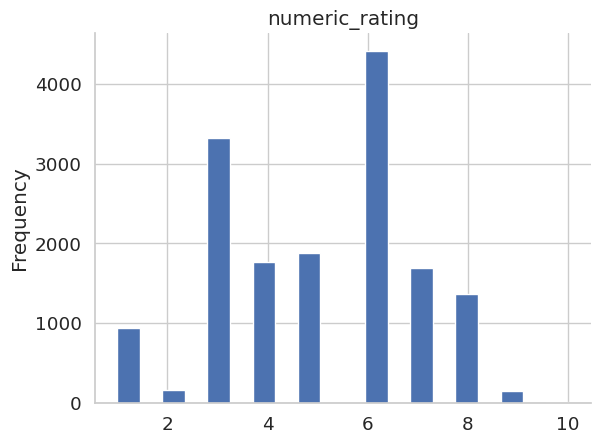

In [33]:
# @title numeric_rating

from matplotlib import pyplot as plt
reviews_df['numeric_rating'].plot(kind='hist', bins=20, title='numeric_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

# 5. Load & Process Aspect Data

In [34]:
# To verify the jsonl is in correct setup

path = os.path.join(DATASET_DIR, 'aspect_data', 'review_with_aspect.jsonl')
print(os.path.exists(path), path)
print("Full path:      ", path)

True /content/drive/MyDrive/1 METU/7/IS 584 – Deep Learning for Text Analytics/project/dataset/aspect_data/review_with_aspect.jsonl
Full path:       /content/drive/MyDrive/1 METU/7/IS 584 – Deep Learning for Text Analytics/project/dataset/aspect_data/review_with_aspect.jsonl


In [35]:
# Count total lines (total reviews with aspect annotations)
!wc -l "{path}"

25986 /content/drive/MyDrive/1 METU/7/IS 584 – Deep Learning for Text Analytics/project/dataset/aspect_data/review_with_aspect.jsonl


In [36]:
# The first entry
with open(path, 'r', encoding='utf-8') as f:
    first = json.loads(f.readline())
print("Keys in first entry:", first.keys())
print("Sample labels:", first['labels'][:2])

Keys in first entry: dict_keys(['id', 'text', 'labels'])
Sample labels: [[0, 1029, 'summary'], [1030, 1201, 'motivation_positive']]


Each line is a JSON dict with:
- **`id`**: paper identifier  
- **`text`**: the full review text  
- **`labels`**: a list of `[start_idx, end_idx, "aspect[_sentiment]"]` tuples  

In [37]:
## LOADER OR N NUMBER OF ENTRIES
def load_aspects(n=3000):
    data = []
    with open(path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= n:
                break
            data.append(json.loads(line))
    return data

# test:
short_list = load_aspects(3)
for e in short_list:
    print(e['id'], "→", len(e['text']), "chars,", len(e['labels']), "labels")


ICLR_2020_1123 → 3508 chars, 7 labels
ICLR_2018_813 → 2632 chars, 3 labels
NIPS_2019_796 → 1881 chars, 12 labels


In [38]:
# WHAT ARE THE LABELS OF ONE ENTRY
sample = short_list[0]
for s, e, tag in sample['labels']:
    snippet = sample['text'][s:e][:50].replace("\n"," ")
    print(f"  [{tag}] → “{snippet}…”")
print(type(sample))
print(sample)

  [summary] → “This work studies the predictive uncertainty issue…”
  [motivation_positive] → “The issue researched in this work is of significan…”
  [clarity_positive] → “The motivation , research issues and the proposed …”
  [soundness_negative] → “The current recommendation is Weak Reject because …”
  [substance_negative] → “this experimental study does not seem to conduct s…”
  [meaningful_comparison_negative] → “Is this comparison fair ?…”
  [soundness_negative] → “The novelty and significance of fine-tuning the pr…”
<class 'dict'>
{'id': 'ICLR_2020_1123', 'text': "This work studies the predictive uncertainty issue of deep learning models . In particular , this work focuses on the distributional uncertainty which is caused by distributional mismatch between training and test examples . The proposed method is developed based on the existing work called Dirichlet Prior Network ( DPN ) . It aims to address the issue of DPN that its loss function is complicated and makes the optimizat

In [39]:
sample

{'id': 'ICLR_2020_1123',
 'text': "This work studies the predictive uncertainty issue of deep learning models . In particular , this work focuses on the distributional uncertainty which is caused by distributional mismatch between training and test examples . The proposed method is developed based on the existing work called Dirichlet Prior Network ( DPN ) . It aims to address the issue of DPN that its loss function is complicated and makes the optimization difficult . Instead , this paper proposes a new loss function for DPN , which consists of the commonly used cross-entropy loss term and a regularization term . Two loss functions are respectively defined over in-domain training examples and out-of-distribution ( OOD ) training examples . The final objective function is a weighted combination of the two loss functions . Experimental study is conducted on one synthetic dataset and two image datasets ( CIFAR-10 and CIFAR-100 ) to demonstrate the properties of the proposed method and co

In [40]:
# SAMPLEEXTRACTION LOOP
rows = []

for entry in tqdm(short_list, desc='Prot aspects'):
    pid, txt = entry['id'], entry['text']
    # Each label is [start_idx, end_idx, "aspect[_sentiment]"]
    for lbl in entry['labels']:
        if len(lbl) < 3:
            continue
        s, e, tag = lbl
        seg = txt[s:e]
        parts = tag.split('_')
        rows.append({
            'paper_id':   pid,
            'aspect':     parts[0],
            'sentiment':  parts[1] if len(parts)>1 else None,
            'length':     len(seg.split())
        })

import pandas as pd
df = pd.DataFrame(rows)
print("Prototype df shape:", df.shape)
print(df.head())


Prot aspects: 100%|██████████| 3/3 [00:00<00:00, 15669.88it/s]

Prototype df shape: (22, 4)
         paper_id      aspect sentiment  length
0  ICLR_2020_1123     summary      None     167
1  ICLR_2020_1123  motivation  positive      26
2  ICLR_2020_1123     clarity  positive      14
3  ICLR_2020_1123   soundness  negative      17
4  ICLR_2020_1123   substance  negative      14


In [41]:
stats = (df.groupby('aspect')
           .agg(count=('aspect','size'),
                pos=('sentiment', lambda x: (x=='positive').sum()),
                neg=('sentiment', lambda x: (x=='negative').sum()),
                neu=('sentiment', lambda x: x.isna().sum()),
                avg_len=('length','mean'))
           .reset_index())
print(stats)

        aspect  count  pos  neg  neu     avg_len
0      clarity      5    2    3    0   16.400000
1   meaningful      1    0    0    0    5.000000
2   motivation      2    2    0    0   15.500000
3  originality      1    0    1    0   10.000000
4    soundness      7    3    4    0   19.000000
5    substance      3    0    3    0   11.000000
6      summary      3    0    0    3  136.666667


Now that `df` holds one row per aspect span (with columns `paper_id`, `aspect`, `sentiment`, `length`), we can:

1. **Compute summary statistics** per aspect type (`count`, `pos`, `neg`, `neu`, `avg_len`).  
2. **Prepare** a long-form `sent_df` for plotting sentiment counts.  
3. **Plot** a 2×2 grid of:
   - (0,0) Aspect span counts  
   - (0,1) Sentiment breakdown by aspect  
   - (1,0) Histogram of span lengths  
   - (1,1) Left blank for symmetry

        aspect  count  pos  neg  neu     avg_len
0      clarity      5    2    3    0   16.400000
1   meaningful      1    0    0    0    5.000000
2   motivation      2    2    0    0   15.500000
3  originality      1    0    1    0   10.000000
4    soundness      7    3    4    0   19.000000
5    substance      3    0    3    0   11.000000
6      summary      3    0    0    3  136.666667


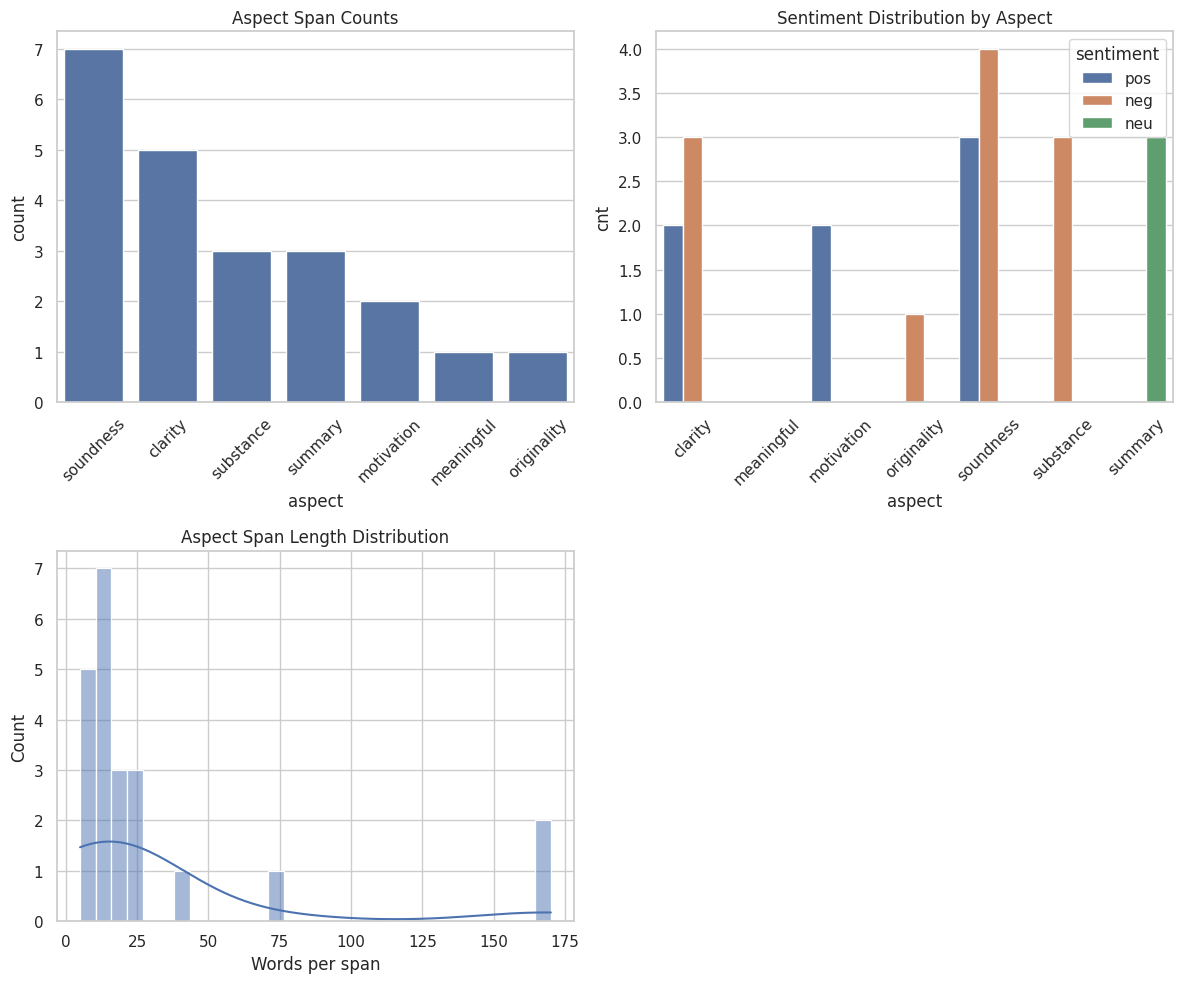

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Compute per-aspect statistics
stats = (
    df
    .groupby('aspect')
    .agg(
        count     = ('aspect', 'size'),
        pos       = ('sentiment', lambda x: (x=='positive').sum()),
        neg       = ('sentiment', lambda x: (x=='negative').sum()),
        neu       = ('sentiment', lambda x: x.isna().sum()),
        avg_len   = ('length', 'mean')
    )
    .reset_index()
)
print(stats)

# 6.2 Prepare sentiment DataFrame for stacked bar
sent_df = stats.melt(
    id_vars='aspect',
    value_vars=['pos','neg','neu'],
    var_name='sentiment',
    value_name='cnt'
)

# 6.3 Create 2×2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Plot 6.1: Aspect span counts
sns.barplot(
    data=stats.sort_values('count', ascending=False),
    x='aspect', y='count', ax=axs[0]
)
axs[0].set_title("Aspect Span Counts")
axs[0].tick_params(axis='x', rotation=45)

# Plot 6.2: Sentiment distribution by aspect
sns.barplot(
    data=sent_df,
    x='aspect', y='cnt', hue='sentiment',
    ax=axs[1]
)
axs[1].set_title("Sentiment Distribution by Aspect")
axs[1].tick_params(axis='x', rotation=45)

# Plot 6.3: Aspect span length histogram
sns.histplot(
    df['length'], bins=30, kde=True,
    ax=axs[2]
)
axs[2].set_title("Aspect Span Length Distribution")
axs[2].set_xlabel("Words per span")

# Leave the last subplot empty for additional plots later
axs[3].axis('off')

plt.tight_layout()
plt.show()


In [43]:
def process_aspects(lst):
    """
    From a list of aspect‐annotated review dicts, produce:
      - aspect_df: one row per labeled span
      - aspect_stats: counts, sentiment breakdown, avg length per aspect
    """
    recs = []  # collect each aspect span as a record

    # Loop through each loaded review entry
    for entry in tqdm(lst, desc='Processing aspects'):
        pid = entry['id']         # paper identifier
        txt = entry['text']       # full review text

        # Each label is [start_idx, end_idx, "aspect[_sentiment]"]
        for lbl in entry.get('labels', []):
            if len(lbl) < 3:
                continue  # skip malformed labels
            start, end, tag = lbl
            seg = txt[start:end]      # extract the span text
            parts = tag.split('_')    # split into aspect and optional sentiment

            recs.append({
                'paper_id': pid,
                'aspect':    parts[0],                     # e.g. "clarity"
                'sentiment': parts[1] if len(parts) > 1 else None,
                'length':    len(seg.split())             # word count of span
            })

    # Build a DataFrame of all spans
    aspect_df = pd.DataFrame(recs)

    # Aggregate stats per aspect type
    aspect_stats = (
        aspect_df
        .groupby('aspect')
        .agg(
            count     = ('aspect', 'size'),
            pos       = ('sentiment', lambda x: (x == 'positive').sum()),
            neg       = ('sentiment', lambda x: (x == 'negative').sum()),
            neu       = ('sentiment', lambda x: x.isna().sum()),
            avg_len   = ('length', 'mean')
        )
        .reset_index()
    )

    return aspect_df, aspect_stats


#
aspect_list   = load_aspects(5000)                   # load 5K entries
aspect_df, aspect_stats = process_aspects(aspect_list)
print(f"Processed {len(aspect_df)} aspect spans across {aspect_stats.shape[0]} aspect types")
aspect_stats.head()

Processing aspects: 100%|██████████| 5000/5000 [00:00<00:00, 25410.94it/s]


Processed 28168 aspect spans across 8 aspect types


,aspect,count,pos,neg,neu,avg_len
0,clarity,5400,2441,2959,0,13.673519
1,meaningful,2035,0,0,0,16.906143
2,motivation,2780,2098,682,0,14.687050
3,originality,3942,2228,1714,0,14.461695
4,replicability,911,49,862,0,13.912184


### 7. Check Table Sizes & Preview Samples

Now that we have our three main tables—`papers_df`, `reviews_df`, and `aspect_df`—let’s:

1. **Verify their dimensions** to ensure we loaded the expected number of rows and columns.  
2. **Peek at the first few rows** of each to see the column names and data.

In [44]:
# Papers vs. Reviews
print("Papers shape:        ", papers_df.shape)   # (rows=number of papers, cols=metadata fields)
print("Reviews shape:       ", reviews_df.shape)  # (rows=individual reviews, cols=review features)
print("Aspect spans shape:  ", aspect_df.shape)   # (rows=each aspect span, cols=span features)

# First few papers
display(papers_df.head(1))
display(reviews_df.head(1))
display(aspect_df.head(1))

Papers shape:         (8877, 8)
Reviews shape:        (34046, 9)
Aspect spans shape:   (28168, 4)


,id,conference,decision,url,hasContent,hasReview,title,authors
0,ICLR_2017_395,ICLR,Reject,http://openreview.net/pdf/c1cfee5be26dee2679a1...,true,true,RL^2: Fast Reinforcement Learning via Slow Rei...,"[Yan Duan, John Schulman, Xi Chen, Peter L. Ba..."


,paper_id,review_type,review_idx,review_text,raw_rating_string,numeric_rating,raw_confidence_string,numeric_confidence,review_length
0,ICLR_2017_335,regular,0,The paper is about channel sparsity in Convolu...,"7: Good paper, accept",7.0,3: The reviewer is fairly confident that the e...,3.0,115


,paper_id,aspect,sentiment,length
0,ICLR_2020_1123,summary,None,167


In [45]:
print(papers_df.columns)
print(reviews_df.columns)
print(aspect_df.columns)

Index(['id', 'conference', 'decision', 'url', 'hasContent', 'hasReview',
       'title', 'authors'],
      dtype='object')
Index(['paper_id', 'review_type', 'review_idx', 'review_text',
       'raw_rating_string', 'numeric_rating', 'raw_confidence_string',
       'numeric_confidence', 'review_length'],
      dtype='object')
Index(['paper_id', 'aspect', 'sentiment', 'length'], dtype='object')


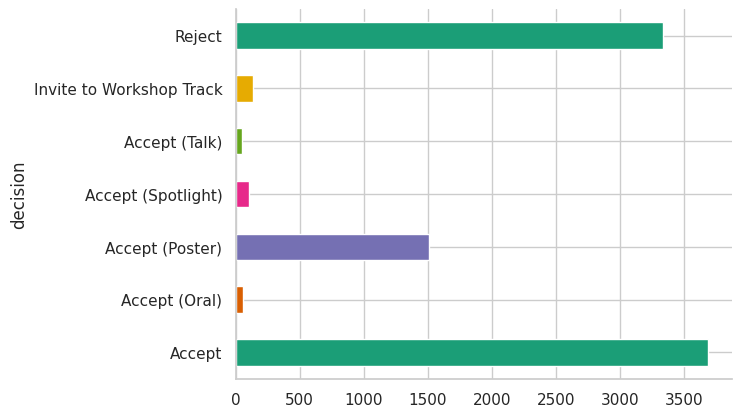

In [46]:
# @title decision

from matplotlib import pyplot as plt
import seaborn as sns
papers_df.groupby('decision').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [47]:
# Preview the first 3 papers
print("\nFirst few papers:")
display(papers_df.head(3))

# Preview the first 3 reviews
print("\nFirst few reviews:")
display(reviews_df.head(3))

# Preview the first 3 aspect spans
print("\nFirst few aspect spans:")
display(aspect_df.head(3))


First few papers:


,id,conference,decision,url,hasContent,hasReview,title,authors
0,ICLR_2017_395,ICLR,Reject,http://openreview.net/pdf/c1cfee5be26dee2679a1...,true,true,RL^2: Fast Reinforcement Learning via Slow Rei...,"[Yan Duan, John Schulman, Xi Chen, Peter L. Ba..."
1,ICLR_2017_281,ICLR,Reject,http://openreview.net/pdf/2f13fb612ef82e430be7...,true,true,A Joint Many-Task Model: Growing a Neural Netw...,"[Kazuma Hashimoto, Caiming Xiong, Yoshimasa Ts..."
2,ICLR_2017_142,ICLR,Accept (Poster),http://openreview.net/pdf/1b6c5951af988d823360...,true,true,Automatic Rule Extraction from Long Short Term...,"[W. James Murdoch, Arthur Szlam]"



First few reviews:


,paper_id,review_type,review_idx,review_text,raw_rating_string,numeric_rating,raw_confidence_string,numeric_confidence,review_length
0,ICLR_2017_335,regular,0,The paper is about channel sparsity in Convolu...,"7: Good paper, accept",7.0,3: The reviewer is fairly confident that the e...,3.0,115
1,ICLR_2017_335,regular,1,This paper aims to improve efficiency of convo...,5: Marginally below acceptance threshold,5.0,4: The reviewer is confident but not absolutel...,4.0,265
2,ICLR_2017_335,regular,2,The paper experiments with channel to channel ...,4: Ok but not good enough - rejection,4.0,4: The reviewer is confident but not absolutel...,4.0,138



First few aspect spans:


,paper_id,aspect,sentiment,length
0,ICLR_2020_1123,summary,None,167
1,ICLR_2020_1123,motivation,positive,26
2,ICLR_2020_1123,clarity,positive,14


### 7. High-Level EDA: Decisions, Review Length, Ratings & Aspect Counts

In this section we create a 2×2 grid of summary plots:

1. **Accept vs. Reject**: Bar chart of simplified paper decisions  
2. **Review Length**: Distribution of review word counts  
3. **Reviewer Ratings**: Bar chart of numeric ratings for “regular” reviews  
4. **Aspect Counts**: Bar chart of how many spans each aspect receives  

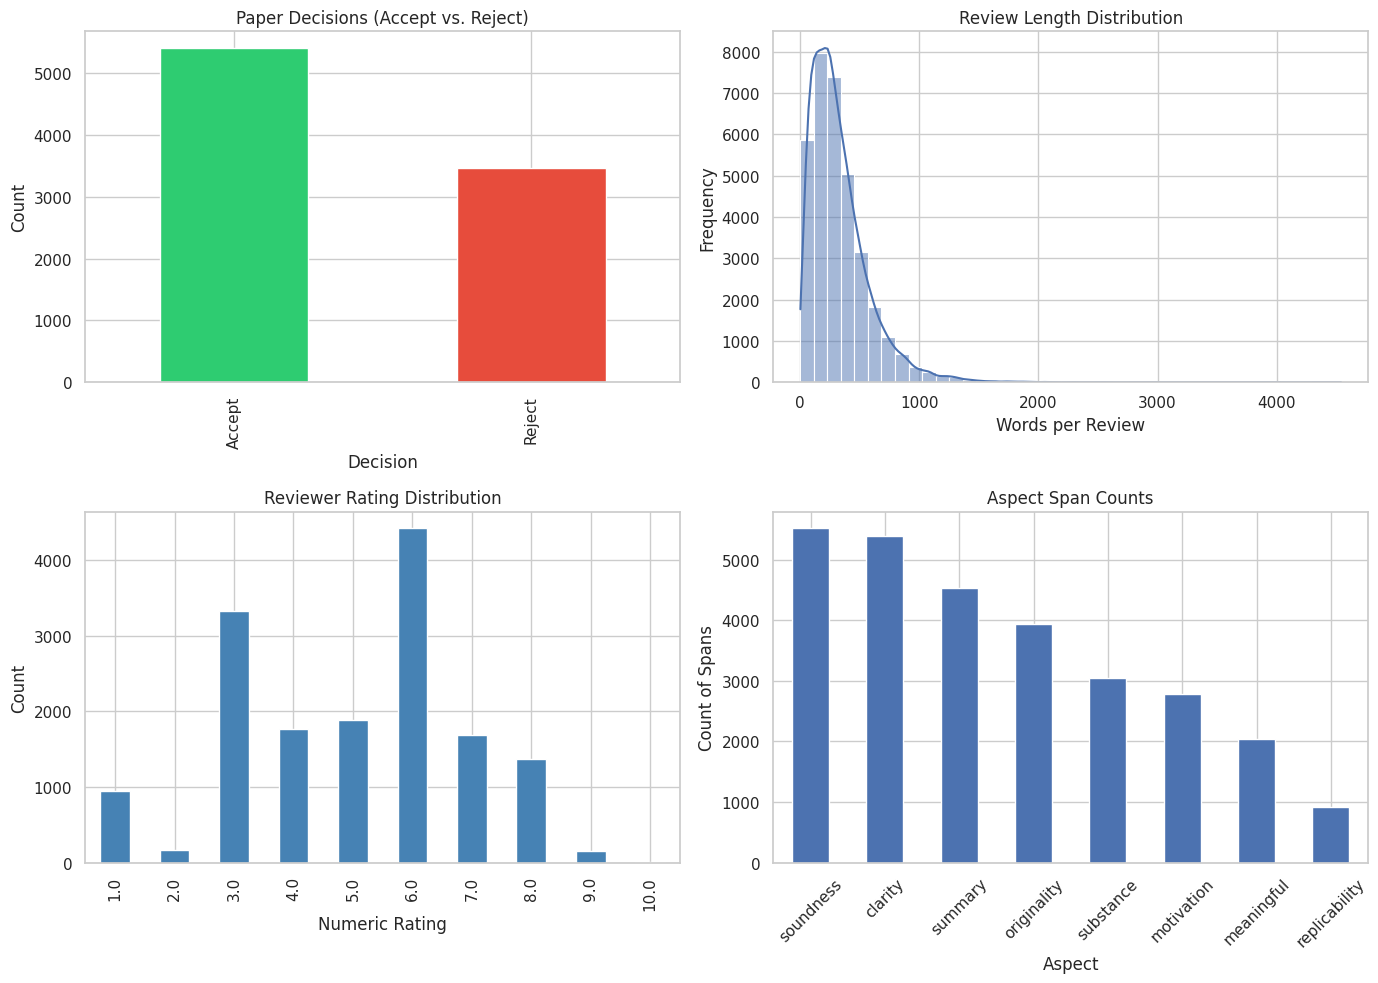

In [48]:
#Improved with ChatGPT to show all symmetrical and names in a beTter way
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

# --- Prepare subsets with correct column names ---
papers_df['simple_decision'] = (
    papers_df['decision']
    .str.contains('Accept')
    .map({True: 'Accept', False: 'Reject'})
)

# Use 'review_type' instead of 'type'
reg = reviews_df[reviews_df['review_type'] == 'regular']

# --- Create 2×2 grid ---
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# 1) Paper Decisions
papers_df['simple_decision'] \
    .value_counts() \
    .plot.bar(color=['#2ecc71','#e74c3c'], ax=axs[0])
axs[0].set_title('Paper Decisions (Accept vs. Reject)')
axs[0].set_xlabel('Decision')
axs[0].set_ylabel('Count')

# 2) Review Length Distribution
sns.histplot(
    reviews_df['review_length'],  # corrected column name
    bins=40, kde=True, ax=axs[1]
)
axs[1].set_title('Review Length Distribution')
axs[1].set_xlabel('Words per Review')
axs[1].set_ylabel('Frequency')

# 3) Reviewer Rating Distribution
# Use 'numeric_rating' rather than 'rating'
reg['numeric_rating'] \
    .value_counts() \
    .sort_index() \
    .plot.bar(color='steelblue', ax=axs[2])
axs[2].set_title('Reviewer Rating Distribution')
axs[2].set_xlabel('Numeric Rating')
axs[2].set_ylabel('Count')

# 4) Aspect Span Counts
aspect_stats.sort_values('count', ascending=False) \
    .plot.bar(x='aspect', y='count', legend=False, ax=axs[3])
axs[3].set_title('Aspect Span Counts')
axs[3].tick_params(axis='x', rotation=45)
axs[3].set_xlabel('Aspect')
axs[3].set_ylabel('Count of Spans')

plt.tight_layout()
plt.show()


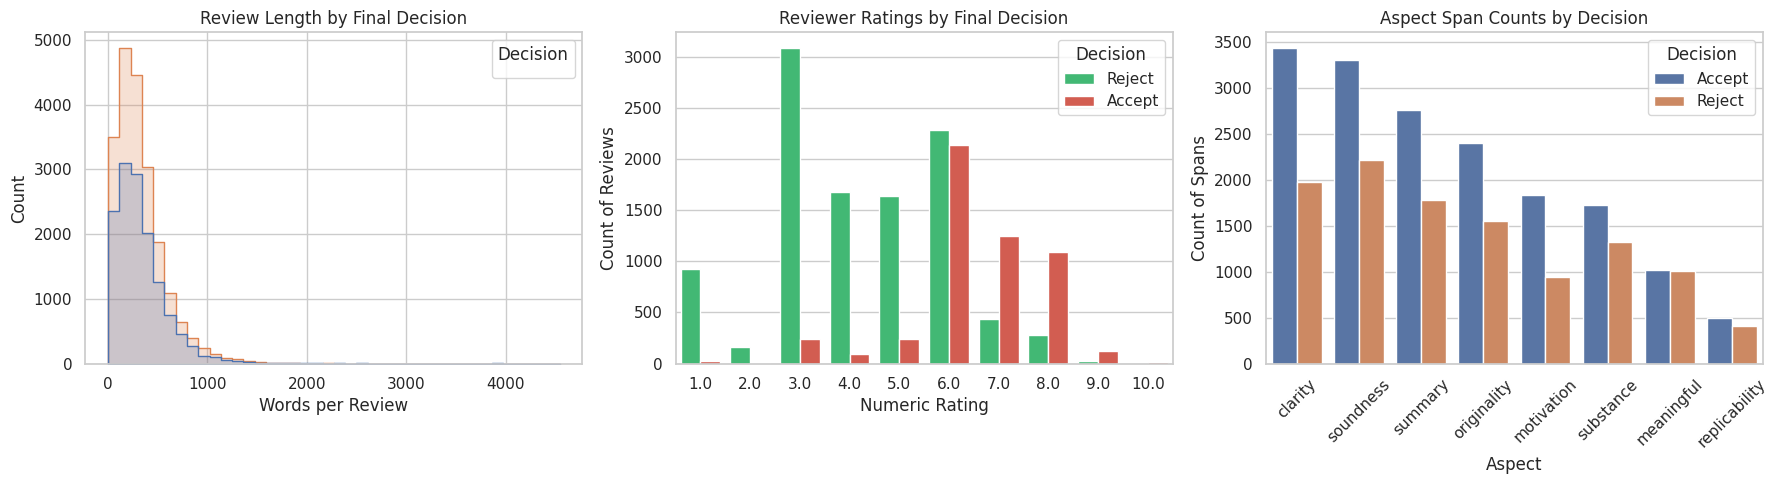

In [49]:
sns.set(style='whitegrid')

# First, we add 'simple_decision' to papers_df if missing.
if 'simple_decision' not in papers_df.columns:
    papers_df['simple_decision'] = (
        papers_df['decision']
        .str.contains('Accept')
        .map({True: 'Accept', False: 'Reject'})
    )

# Next, propagate that same decision label into reviews_df via the paper_id key.
reviews_df['simple_decision'] = reviews_df['paper_id'] \
    .map(papers_df.set_index('id')['simple_decision'])

# Now we build a side-by-side comparison: review length, rating, and aspect counts by decision.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# —— Plot A: How long are reviews for accepted vs. rejected papers?
sns.histplot(
    data=reviews_df,
    x='review_length',
    hue='simple_decision',
    bins=40,
    element='step',
    stat='count',
    common_norm=False,
    ax=axes[0]
)
axes[0].set_title("Review Length by Final Decision")
axes[0].set_xlabel("Words per Review")
axes[0].set_ylabel("Count")
# Seaborn drew the legend automatically; reposition it for clarity
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels, title="Decision", loc='upper right')

# —— Plot B: Distribution of numeric ratings, split by decision
sns.countplot(
    data=reviews_df[reviews_df['review_type'] == 'regular'],
    x='numeric_rating',
    hue='simple_decision',
    palette=['#2ecc71', '#e74c3c'],
    ax=axes[1]
)
axes[1].set_title("Reviewer Ratings by Final Decision")
axes[1].set_xlabel("Numeric Rating")
axes[1].set_ylabel("Count of Reviews")
axes[1].legend(title="Decision")

# —— Plot C: How many aspect annotations appear in accepts vs. rejects?
#    We merge aspect_df with simple_decision, then count spans per aspect & decision.
aspect_counts = (
    aspect_df
    .merge(
        papers_df[['id', 'simple_decision']],
        left_on='paper_id',
        right_on='id',
        how='left'
    )
    .groupby(['aspect', 'simple_decision'])
    .size()
    .reset_index(name='count')
)

sns.barplot(
    data=aspect_counts.sort_values('count', ascending=False),
    x='aspect',
    y='count',
    hue='simple_decision',
    ax=axes[2]
)
axes[2].set_title("Aspect Span Counts by Decision")
axes[2].set_xlabel("Aspect")
axes[2].set_ylabel("Count of Spans")
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title="Decision")

plt.tight_layout()
plt.show()

It’s interesting to see that both accepted and rejected papers have similar review‐length ranges overall, but really long reviews (around 800–1500 words) show up more often when papers get accepted. This tells me that length by itself isn’t a perfect clue, but when a review is unusually detailed it’s a helpful hint. The rating scores give a clearer picture—most rejects fall in the 3–5 range and most accepts in the 6–8 range—but scores of 5 and 6 overlap in both groups. That overlap is exactly where pulling up past examples could help decide. With a RAG layer, we could grab similar 1,000‐word reviews and see how they turned out, or look at past 5–6 scores with the same mix of comments to learn which details mattered most. Finally, accepted papers usually get more aspect notes (like soundness or clarity) than rejects, but there’s still overlap. An agent that checks each aspect one by one—and even brings in past cases for rare aspects—could pick up on nuances a single‐step model would miss. Altogether, these observations make me confident that combining retrieval with a multi‐step reasoning process will give us stronger, more reliable predictions when things aren’t black and white.  



In [50]:
import wandb
import os

# Set your W&B API key - Add your API key here or use environment variable
# os.environ["WANDB_API_KEY"] = "your_api_key_here"

# os.environ["WANDB_MODE"] = "offline"

### TF-IDF + Logistic Regression baseline:

In [44]:
'''
# Baseline: TF-IDF + Logistic Regression for Aspect Classification

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import time
import wandb
import numpy as np
import pandas as pd  # Import pandas

# Initialize W&B
wandb.init(project="ASAP_review", name="tfidf-aspect-baseline")

# Prepare data from your aspect_spans dataframe
# First, merge with reviews to get the review text
# Using aspect_df and reviews_df as your dataframe names
aspect_data = aspect_df.merge(reviews_df[['paper_id', 'review_text']], on='paper_id')

# Extract features and labels
X = aspect_data['review_text']  # Using review text as features
y = aspect_data['aspect']       # Using aspect as labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Start timer
start_time = time.time()

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)

# End timer
end_time = time.time()
training_time = (end_time - start_time) / 60  # in minutes

# Log metrics to W&B
wandb.log({
    "accuracy": accuracy,
    "f1_score": f1,
    "training_time": training_time
})

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print(f"Training Time: {training_time:.2f} minutes")
print("\nClassification Report:")
print(report)

wandb.finish()
'''

wandb: Currently logged in as: tuna-ozturk209 (tuna-ozturk1283) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Accuracy: 0.1476
F1 Score (macro): 0.1457
Training Time: 2.16 minutes

Classification Report:
               precision    recall  f1-score   support

      clarity       0.25      0.15      0.19      4312
   meaningful       0.13      0.27      0.17      1615
   motivation       0.13      0.19      0.16      2223
  originality       0.16      0.14      0.15      3145
replicability       0.07      0.32      0.12       725
    soundness       0.21      0.11      0.15      4391
    substance       0.15      0.19      0.17      2411
      summary       0.10      0.05      0.07      3634

     accuracy                           0.15     22456
    macro avg       0.15      0.18      0.15     22456
 weighted avg       0.17      0.15      0.15     22456



accuracy,▁
f1_score,▁
training_time,▁
accuracy,0.14758
f1_score,0.14573
training_time,2.15893


In [45]:
# aspect_data.head(1)

,paper_id,aspect,sentiment,length,review_text
0,ICLR_2020_1123,summary,None,167,This work studies the predictive uncertainty i...


In [51]:
# Baseline: TF-IDF + Logistic Regression for Aspect Classification
# after 'review_text','raw_rating_string','raw_confidence_string' is added
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import time
import wandb
import numpy as np
import pandas as pd  # Import pandas

# Initialize W&B
wandb.init(project="ASAP_review", name="tfidf-aspect-baseline")

# Prepare data from your aspect_spans dataframe
# First, merge with reviews to get the review text
# Using aspect_df and reviews_df as your dataframe names and included the additional 2 strings
aspect_data = aspect_df.merge(reviews_df[['paper_id', 'review_text','raw_rating_string','raw_confidence_string']], on='paper_id')

# Extract features and labels
X = aspect_data['review_text']  # Using review text as features
y = aspect_data['aspect']       # Using aspect as labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Start timer
start_time = time.time()

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)

# End timer
end_time = time.time()
training_time = (end_time - start_time) / 60  # in minutes

# Log metrics to W&B
wandb.log({
    "accuracy": accuracy,
    "f1_score": f1,
    "training_time": training_time
})

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print(f"Training Time: {training_time:.2f} minutes")
print("\nClassification Report:")
print(report)

wandb.finish()


wandb: Currently logged in as: tuna-ozturk209 (tuna-ozturk1283) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Accuracy: 0.1476
F1 Score (macro): 0.1457
Training Time: 2.16 minutes

Classification Report:
               precision    recall  f1-score   support

      clarity       0.25      0.15      0.19      4312
   meaningful       0.13      0.27      0.17      1615
   motivation       0.13      0.19      0.16      2223
  originality       0.16      0.14      0.15      3145
replicability       0.07      0.32      0.12       725
    soundness       0.21      0.11      0.15      4391
    substance       0.15      0.19      0.17      2411
      summary       0.10      0.05      0.07      3634

     accuracy                           0.15     22456
    macro avg       0.15      0.18      0.15     22456
 weighted avg       0.17      0.15      0.15     22456



accuracy,▁
f1_score,▁
training_time,▁
accuracy,0.14758
f1_score,0.14573
training_time,2.15565


In [52]:
!pip install -qU transformers
!pip show transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 98.6 MB/s eta 0:00:00
Name: transformers
Version: 4.52.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: peft, sentence-transformers


In [53]:
print(aspect_df.columns)
print(reviews_df.columns)
print(papers_df.columns)


Index(['paper_id', 'aspect', 'sentiment', 'length'], dtype='object')
Index(['paper_id', 'review_type', 'review_idx', 'review_text',
       'raw_rating_string', 'numeric_rating', 'raw_confidence_string',
       'numeric_confidence', 'review_length', 'simple_decision'],
      dtype='object')
Index(['id', 'conference', 'decision', 'url', 'hasContent', 'hasReview',
       'title', 'authors', 'simple_decision'],
      dtype='object')


In [54]:
# Code has warned and I used colabs help and added the 'label' column by mapping the 'simple_decision'
# Ensure 'simple_decision' exists and drop NaNs before mapping
if 'simple_decision' not in reviews_df.columns:
     print("Warning: 'simple_decision' column not found. Cannot create 'label'.")
     # Decide how to handle: exit, create dummy column, etc.
     # For now, we'll assume the previous cell adding 'simple_decision' ran successfully.
     pass # Or raise an error, depending on desired behavior

# Map 'simple_decision' to 0/1 for the 'label' column
# Drop rows where 'simple_decision' is NaN before mapping to avoid errors
reviews_df = reviews_df.dropna(subset=["simple_decision"]).reset_index(drop=True)
reviews_df["label"] = reviews_df["simple_decision"].map({"Reject": 0, "Accept": 1})

In [55]:
print(aspect_df.columns)
print(reviews_df.columns)
print(papers_df.columns)

Index(['paper_id', 'aspect', 'sentiment', 'length'], dtype='object')
Index(['paper_id', 'review_type', 'review_idx', 'review_text',
       'raw_rating_string', 'numeric_rating', 'raw_confidence_string',
       'numeric_confidence', 'review_length', 'simple_decision', 'label'],
      dtype='object')
Index(['id', 'conference', 'decision', 'url', 'hasContent', 'hasReview',
       'title', 'authors', 'simple_decision'],
      dtype='object')


In [56]:
# 1. Count how many missing labels or texts you have
print("Missing labels:", reviews_df["label"].isna().sum())
print("Missing review_text:", reviews_df["review_text"].isna().sum())

# 2. See the rows with missing labels
missing_label_rows = reviews_df[reviews_df["label"].isna()]
display(missing_label_rows.head(10)[["review_text", "simple_decision"]])

# 3. full missing-value summary on every column
print(reviews_df.isna().sum())


Missing labels: 0
Missing review_text: 0


,review_text,simple_decision


paper_id                     0
review_type                  0
review_idx                   0
review_text                  0
raw_rating_string         5924
numeric_rating           18315
raw_confidence_string     5924
numeric_confidence       21853
review_length                0
simple_decision              0
label                        0
dtype: int64


In [57]:
reviews_df = reviews_df.dropna(subset=["simple_decision"]).reset_index(drop=True)

In [58]:
# 1. Count how many missing labels or texts you have
print("Missing labels:", reviews_df["label"].isna().sum())
print("Missing review_text:", reviews_df["review_text"].isna().sum())

# 2. See the rows with missing labels
missing_label_rows = reviews_df[reviews_df["label"].isna()]
display(missing_label_rows.head(10)[["review_text", "simple_decision"]])

# 3. Or get a full missing-value summary on every column
print(reviews_df.isna().sum())

Missing labels: 0
Missing review_text: 0


,review_text,simple_decision


paper_id                     0
review_type                  0
review_idx                   0
review_text                  0
raw_rating_string         5924
numeric_rating           18315
raw_confidence_string     5924
numeric_confidence       21853
review_length                0
simple_decision              0
label                        0
dtype: int64


Train/Validation Split & Tokenization

In [ ]:
'''from sklearn.model_selection import train_test_split
from datasets import Dataset

# 90/10 stratified split
df_train, df_val = train_test_split(
    reviews_df[["review_text", "label"]],
    test_size=0.1,
    random_state=42,
    stratify=reviews_df["label"]
)

# Tokenizer
def tokenize_batch(batch):
    return tokenizer(
        batch["review_text"],
        truncation=True,
        padding="max_length",
        max_length=512
    )

# Build HF Datasets
train_dataset = (
    Dataset.from_pandas(df_train)
           .map(tokenize_batch, batched=True)
           .rename_column("label", "labels")
           .remove_columns(["review_text", "__index_level_0__"])
)

val_dataset = (
    Dataset.from_pandas(df_val)
           .map(tokenize_batch, batched=True)
           .rename_column("label", "labels")
           .remove_columns(["review_text", "__index_level_0__"])
)
'''


Map:   0%|          | 0/30638 [00:00<?, ? examples/s]

Map:   0%|          | 0/3405 [00:00<?, ? examples/s]

Baseline BERT Training

In [59]:
# Debugged and rewritten wwith GPT
!pip install -U scikit-learn evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.6 MB/s eta 0:00:00


In [60]:
# 2) Imports
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_linear_schedule_with_warmup
from torch.optim import AdamW
from sklearn.metrics import accuracy_score, f1_score, classification_report
import time
import wandb
import numpy as np
import pandas as pd

In [61]:
# 3) Login to W&B
import wandb
# wandb.login() - Add your API key or use wandb login from command line

wandb.init(
    project="ASAP_review",
    entity="tuna-ozturk1283",
    name="bert-finetune-increased-txt"
)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# BERT Model Fine-tuning for Aspect Classification with Rating String Information

In [64]:
# BERT Model Fine-tuning for Aspect Classification with Rating String Information

import torch
from torch.utils.data import DataLoader, TensorDataset
# Remove AdamW from the transformers import
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score, f1_score, classification_report
import time
import wandb
import numpy as np
import pandas as pd

# Initialize W&B
wandb.init(project="ASAP_review", name="bert-aspect-classification-with-rating-strings")

# Prepare data from your aspect_df dataframe
# First, merge with reviews_df to get the review text and rating information
aspect_data = aspect_df.merge(
    reviews_df[['paper_id', 'review_text', 'raw_rating_string', 'raw_confidence_string', 'numeric_rating', 'numeric_confidence']],
    on='paper_id'
)


In [67]:
# Fill NaN values in string columns with empty strings
aspect_data['raw_rating_string'] = aspect_data['raw_rating_string'].fillna('')
aspect_data['raw_confidence_string'] = aspect_data['raw_confidence_string'].fillna('')

# Combine review text with rating strings to create enhanced input
aspect_data['combined_text'] = (
    aspect_data['review_text'] +
    " [RATING] " + aspect_data['raw_rating_string'] +
    " [CONFIDENCE] " + aspect_data['raw_confidence_string']
)

# Extract features and labels
X_text = aspect_data['combined_text']  # Combined text features including rating strings
y = aspect_data['aspect']  # Using aspect as labels

In [ ]:
'''
!pip install -U huggingface_hub transformers

from huggingface_hub import notebook_login
# this will pop up the widget to paste your token
notebook_login()
'''

In [ ]:
# Create label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_labels = len(label_encoder.classes_)

# Split data
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Tokenization
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
max_length = 512

# Tokenize data
train_encodings = tokenizer(X_train_text.tolist(), truncation=True, padding=True, max_length=max_length, return_tensors='pt')
test_encodings = tokenizer(X_test_text.tolist(), truncation=True, padding=True, max_length=max_length, return_tensors='pt')

# Convert labels to tensors
train_labels = torch.tensor(y_train)
test_labels = torch.tensor(y_test)

# Create datasets
train_dataset = TensorDataset(
    train_encodings['input_ids'],
    train_encodings['attention_mask'],
    train_labels
)
test_dataset = TensorDataset(
    test_encodings['input_ids'],
    test_encodings['attention_mask'],
    test_labels
)

# Create dataloaders
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Initialize model using AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=num_labels
)

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=1e-4)

# Add learning rate scheduler
total_steps = len(train_loader) * 3  # 3 epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Start timer
start_time = time.time()

epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_loader)

    # Evaluation
    model.eval()
    predictions = []
    true_labels = []
    eval_loss = 0

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            eval_loss += loss.item()

            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().numpy()

            predictions.extend(preds)
            true_labels.extend(labels.cpu().numpy())

    avg_eval_loss = eval_loss / len(test_loader)
    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='macro')

    # Map numeric predictions back to original labels for better interpretability
    original_class_predictions = label_encoder.inverse_transform(predictions)

    wandb.log({
        'epoch': epoch,
        'train_loss': avg_train_loss,
        'eval_loss': avg_eval_loss,
        'accuracy': accuracy,
        'f1_score': f1
    })

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Train Loss: {avg_train_loss:.4f}")
    print(f"Eval Loss: {avg_eval_loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")
    print("-" * 50)

# End timer
end_time = time.time()
training_time = (end_time - start_time) / 60  # in minutes

print(f"Total Training Time: {training_time:.2f} minutes")



Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
Train Loss: 1.9832
Eval Loss: 1.9844
Accuracy: 0.1955
F1 Score (macro): 0.0409
--------------------------------------------------


In [ ]:
# Final evaluation
final_accuracy = accuracy_score(true_labels, predictions)
final_f1 = f1_score(true_labels, predictions, average='macro')
report = classification_report(true_labels, predictions, target_names=label_encoder.classes_)

wandb.log({
    'final_accuracy': final_accuracy,
    'final_f1_score': final_f1,
    'training_time': training_time
})

print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final F1 Score (macro): {final_f1:.4f}")
print("\nClassification Report:")
print(report)

# Save the fine-tuned model
model_save_path = "finetuned_bert_with_rating_strings"
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)
wandb.save(f"{model_save_path}/*")

# Log model to W&B as an artifact
model_artifact = wandb.Artifact('finetuned_bert_with_rating_strings', type='model')
model_artifact.add_dir(model_save_path)
wandb.log_artifact(model_artifact)

wandb.finish()


In [ ]:
from huggingface_hub import HfApi, Repository

repo_id = "tuna1283/finetuned-bert-with-rating-strings"

api = HfApi()
api.create_repo(repo_id=repo_id, exist_ok=True)

repo = Repository(local_dir="hf_model_repo", clone_from=repo_id)

!cp -r finetuned_bert_with_rating_strings/* hf_model_repo/

repo.git_add()
repo.git_commit("Add finetuned BERT w/ rating strings")
repo.git_push()


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

repo_id = "tuna1283/finetuned-bert-with-rating-strings"
model = AutoModelForSequenceClassification.from_pretrained(repo_id)
tokenizer = AutoTokenizer.from_pretrained(repo_id)

print("✅ Loaded from HF:", model.__class__.__name__, tokenizer.__class__.__name__)


In [ ]:
# previous training
trainer.train()


Map:   0%|          | 0/30638 [00:00<?, ? examples/s]

Map:   0%|          | 0/3405 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.368000,0.394560,0.816446,0.872651,0.814418,0.842530
2,0.319000,0.367301,0.830837,0.840166,0.888456,0.863636
3,0.262800,0.498957,0.824963,0.861898,0.845105,0.853419


TrainOutput(global_step=5745, training_loss=0.3334573971488561, metrics={'train_runtime': 1917.6207, 'train_samples_per_second': 47.931, 'train_steps_per_second': 2.996, 'total_flos': 2.418358954235904e+16, 'train_loss': 0.3334573971488561, 'epoch': 3.0})

In [ ]:
# Recalculating evaluation metrics on the validation set to confirm performance

# 1. Use the trainer (or model) to get predictions on the validation set
# Assuming we have a HuggingFace Trainer set up as `trainer` and a validation dataset `val_dataset`:
eval_results = trainer.evaluate()
print("Recomputed evaluation metrics:", eval_results)

# The expected output should be similar to earlier:
# For example:
# {'eval_loss': 0.41, 'eval_accuracy': 0.8167, 'eval_precision': 0.8401,
#  'eval_recall': 0.8597, 'eval_f1': 0.8498, ...}

# 2. Extract predictions and true labels for manual verification (if needed)
pred_outputs = trainer.predict(val_dataset)
y_pred = np.argmax(pred_outputs.predictions, axis=1)   # predicted class indices
y_true = pred_outputs.label_ids                        # true class indices

# Compute classification metrics manually to double-check
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall    = recall_score(y_true, y_pred, average='binary')
f1        = f1_score(y_true, y_pred, average='binary')

print(f"Manual check – Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
      f"Recall: {recall:.4f}, F1: {f1:.4f}")

# 3. (Optional) Compute Jaccard similarity for each sample and average it.
# In a single-label classification, this is equivalent to accuracy per sample (1 if correct, 0 if incorrect).
jaccard_scores = []
for true_label, pred_label in zip(y_true, y_pred):
    # Treat each label as a set with one element and compute Jaccard index with the predicted set
    if true_label == pred_label:
        jaccard_scores.append(1.0)   # perfect overlap if prediction is correct
    else:
        jaccard_scores.append(0.0)   # no overlap if prediction is wrong

mean_jaccard = np.mean(jaccard_scores)
print(f"Average Jaccard similarity (for single-label task, equals accuracy): {mean_jaccard:.4f}")


Recomputed evaluation metrics: {'eval_loss': 0.3673006296157837, 'eval_accuracy': 0.8308370044052863, 'eval_precision': 0.8401658222017504, 'eval_recall': 0.8884559181685339, 'eval_f1': 0.8636363636363636, 'eval_runtime': 24.7257, 'eval_samples_per_second': 137.711, 'eval_steps_per_second': 17.229, 'epoch': 3.0}
Manual check – Accuracy: 0.8308, Precision: 0.8402, Recall: 0.8885, F1: 0.8636
Average Jaccard similarity (for single-label task, equals accuracy): 0.8308


In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer

# 1) Reload a fresh BERT (no training yet)
base_model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2
)

# 2) Wrap in a Trainer with the same args and eval/data
base_trainer = Trainer(
    model=base_model,
    args=training_args,       # same TrainingArguments you’ll use for fine-tuning
    train_dataset=train_dataset,  # not used here, but needed by Trainer API
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# 3) Evaluate untrained BERT
base_eval_results = base_trainer.evaluate()
print("Untrained BERT eval metrics:", base_eval_results)

# 4) (Optional) Manual sanity check via predict + sklearn
pred_out = base_trainer.predict(val_dataset)
y_pred_base = np.argmax(pred_out.predictions, axis=1)
y_true      = pred_out.label_ids

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Untrained manual check — "
      f"Acc: {accuracy_score(y_true,y_pred_base):.4f}, "
      f"Prec: {precision_score(y_true,y_pred_base,average='binary'):.4f}, "
      f"Rec: {recall_score(y_true,y_pred_base,average='binary'):.4f}, "
      f"F1:  {f1_score(y_true,y_pred_base,average='binary'):.4f}")

jaccard_base = (y_pred_base == y_true).mean()
print(f"Untrained model Jaccard (≈Accuracy): {jaccard_base:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Untrained BERT eval metrics: {'eval_loss': 0.68648761510849, 'eval_model_preparation_time': 0.0029, 'eval_accuracy': 0.5864904552129222, 'eval_precision': 0.5999380229315153, 'eval_recall': 0.9430102289332684, 'eval_f1': 0.7333333333333333, 'eval_runtime': 24.7347, 'eval_samples_per_second': 137.661, 'eval_steps_per_second': 17.223}
Untrained manual check — Acc: 0.5865, Prec: 0.5999, Rec: 0.9430, F1:  0.7333
Untrained model Jaccard (≈Accuracy): 0.5865


In [ ]:
import pandas as pd

base_row = {
    'Model':    'Untrained BERT',
    'Accuracy': base_eval_results['eval_accuracy'],
    'Precision':base_eval_results['eval_precision'],
    'Recall':   base_eval_results['eval_recall'],
    'F1':       base_eval_results['eval_f1'],
    'Jaccard':  jaccard_base
}

fine_row = {
    'Model':    'Fine-tuned BERT',
    'Accuracy': eval_results['eval_accuracy'],
    'Precision':eval_results['eval_precision'],
    'Recall':   eval_results['eval_recall'],
    'F1':       eval_results['eval_f1'],
    'Jaccard':  mean_jaccard
}

df_compare = pd.DataFrame([base_row, fine_row]).set_index('Model')
print(df_compare.round(4))


                 Accuracy  Precision  Recall      F1  Jaccard
Model                                                        
Untrained BERT     0.5865     0.5999  0.9430  0.7333   0.5865
Fine-tuned BERT    0.8308     0.8402  0.8885  0.8636   0.8308


In [ ]:
import torch

# 1) Pick GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2) Move your fine-tuned model onto the device
model.to(device)

# 3) Set it to eval mode (disables dropout, etc.)
model.eval()


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
import numpy as np

def predict_decision(text: str):
    """
    Tokenizes `text`, runs it through your fine-tuned BERT,
    and returns ("Accept"/"Reject", confidence_score).
    """
    # Tokenize & push tensors to device
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=512
    ).to(device)

    # Forward pass without gradients
    with torch.no_grad():
        logits = model(**inputs).logits

    # Softmax → probabilities
    probs = torch.softmax(logits, dim=-1).cpu().numpy()[0]
    pred_idx = int(np.argmax(probs))

    # Map 0→Reject, 1→Accept
    label = "Accept" if pred_idx == 1 else "Reject"
    confidence = probs[pred_idx]
    return label, confidence


In [ ]:
while True:
    review = input("\nEnter review text (or 'quit'): ")
    if review.lower().startswith("quit"):
        break
    label, conf = predict_decision(review)
    print(f"→ {label}  (confidence={conf:.2f})")




Enter review text (or 'quit'): This work introduces a novel algorithm that thoroughly outperforms baselines.
→ Accept  (confidence=0.97)

Enter review text (or 'quit'): THIS WORKS SEEMS LIKE A BIT OLD FASHIONED
→ Accept  (confidence=0.60)

Enter review text (or 'quit'): THIS WORK DOES NOT SEEM APPEALING TO ME
→ Reject  (confidence=0.63)

Enter review text (or 'quit'): QUIT


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

class ConferenceClassifierAgent:
    def __init__(self, model, tokenizer, label_names=None):
        """
        A simple AI agent that uses a fine-tuned BERT model to classify text
        as either ICLR or NIPS.
        """
        self.model = model
        self.tokenizer = tokenizer
        # Define the label names for readability (defaults to NIPS/ICLR if not provided)
        if label_names is None:
            label_names = ["NIPS", "ICLR"]  # index 0 -> NIPS, 1 -> ICLR
        self.label_names = label_names
        # Detect the device the model is on
        self.device = self.model.device
        print(f"Agent initialized. Model is on device: {self.device}")


    def predict_conference(self, text):
        """
        Predict the conference (ICLR or NIPS) for the given text.
        Returns the name of the predicted conference.
        """
        # Tokenize the input text (convert to model input IDs, attention mask, etc.)
        # Return tensors as PyTorch tensors
        inputs = self.tokenizer(text, return_tensors='pt', truncation=True, padding=True)


        inputs = {name: tensor.to(self.device) for name, tensor in inputs.items()}
        # -------------------------------------------------------------

        # Run the BERT model to get output logits. No gradient needed, this is inference.
        with torch.no_grad():
            outputs = self.model(**inputs)

        logits = outputs.logits  # shape: [1, 2] for binary classification

        # Convert logits to probabilities with softmax
        # Move logits back to CPU before converting to numpy for easier handling
        probs = torch.softmax(logits, dim=1)[0].cpu().numpy()
        prob_nips, prob_iclr = probs  # unpack the two probabilities (they sum to 1.0)

        # Apply a simple threshold to decide the class (for 2 classes, this is equivalent to argmax)
        if prob_iclr >= 0.5:
            pred_label = 1  # ICLR predicted
        else:
            pred_label = 0  # NIPS predicted

        # Get the human-readable label
        predicted_conf_name = self.label_names[pred_label]
        return predicted_conf_name

# Initialize the agent with our fine-tuned model and tokenizer
agent = ConferenceClassifierAgent(model, tokenizer)

# Example 1: Use a sample from the validation set to test the agent
sample_text = df_val["review_text"].iloc[0]  # first review text in validation set
true_label_idx = int(df_val["label"].iloc[0])
true_label_name = agent.label_names[true_label_idx]

predicted_conf = agent.predict_conference(sample_text)
print("Sample review text (truncated):", sample_text[:200], "...\n")  # printing first 200 chars for brevity
print(f"Actual Conference: {true_label_name},  Predicted Conference: {predicted_conf}")

# Example 2: Try a custom example (a short synthesized review) to see what the agent predicts
custom_text = ("This paper presents a novel approach to optimize neural network training. "
               "The reviewers praise the clarity and significance of the results, and all concerns were addressed. "
               "Overall, it seems suitable for a top conference.")
print("\nCustom review text:", custom_text)
print("Predicted Conference for custom text:", agent.predict_conference(custom_text))

Agent initialized. Model is on device: cuda:0
Sample review text (truncated): The paper addressed the erroneous label problem for supervised training. The problem is well formulated and the presented solution is novel. 

The experimental justification is limited. The effectiven ...

Actual Conference: ICLR,  Predicted Conference: ICLR

Custom review text: This paper presents a novel approach to optimize neural network training. The reviewers praise the clarity and significance of the results, and all concerns were addressed. Overall, it seems suitable for a top conference.
Predicted Conference for custom text: ICLR


PRE AGENT, JUST TO TEST

In [ ]:
while True:
    # 1) Ask which conference this review is for
    conf = input("\nWhich conference (ICLR/NIPS)? ").strip().upper()
    if conf in ("QUIT", "EXIT"):
        break
    if conf not in ("ICLR", "NIPS"):
        print(" → Please enter either ICLR or NIPS (or ‘quit’).")
        continue

    # 2) Ask for the review text
    review = input("Enter review text (or 'quit'): ")
    if review.lower().startswith("quit"):
        break

    # 3) Decide Accept/Reject
    if conf == "NIPS":
        # NIPS in this dataset only has accepts
        decision, decision_conf = "Accept", 1.00
    else:
        # run your fine‐tuned BERT
        decision, decision_conf = predict_decision(review)

    # 4) Print the results
    print(f"→ Conference: {conf}")
    print(f"→ Decision:   {decision}  (confidence={decision_conf:.2f})")



Which conference (ICLR/NIPS)? NIPS
Enter review text (or 'quit'): THIS PAPER WAS THE WORST ONE I SAW
→ Conference: NIPS
→ Decision:   Accept  (confidence=1.00)

Which conference (ICLR/NIPS)? ICLR
Enter review text (or 'quit'): THIS PAPER WAS THE WORST ONE I SAW
→ Conference: ICLR
→ Decision:   Accept  (confidence=0.93)

Which conference (ICLR/NIPS)? QUIT


In [ ]:
!pip install langchain openai

just for leaning i am uploading this trained model to my hf account:

# Add your Hugging Face API key here



In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# 0) Pull out the true labels for val
y_val = np.array(df_val["label"])

# 1) Majority‐class baseline
majority = df_train["label"].mode()[0]
acc_majority = (y_val == majority).mean()
print(f"Majority baseline accuracy: {acc_majority:.4f}")

# 2) “Before” – evaluate the untrained BERT head
from transformers import AutoModelForSequenceClassification, Trainer

# load fresh model
untrained = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=2
)
# make a Trainer just for evaluation
dummy_trainer = Trainer(
    model=untrained,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)
metrics_before = dummy_trainer.evaluate()
print("Untrained BERT metrics:", metrics_before)

# 3) “After” – evaluate your fine-tuned model
metrics_after = trainer.evaluate()   # assuming this is your trained Trainer
print("Fine-tuned BERT metrics:", metrics_after)


Majority baseline accuracy: 0.6029


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Untrained BERT metrics: {'eval_loss': 0.831637978553772, 'eval_model_preparation_time': 0.0032, 'eval_accuracy': 0.39794419970631423, 'eval_precision': 0.6666666666666666, 'eval_recall': 0.0029225523623964927, 'eval_f1': 0.005819592628516004, 'eval_runtime': 29.5645, 'eval_samples_per_second': 115.172, 'eval_steps_per_second': 14.409}


Fine-tuned BERT metrics: {'eval_loss': 0.4120626151561737, 'eval_accuracy': 0.8167400881057268, 'eval_precision': 0.8400761542122799, 'eval_recall': 0.8597174866049684, 'eval_f1': 0.8497833413577275, 'eval_runtime': 30.1567, 'eval_samples_per_second': 112.91, 'eval_steps_per_second': 14.126, 'epoch': 3.0}


In [ ]:
import os
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "tuna1283/outputs"

# --- Verification Step ---
# Check if the directory exists
if not os.path.isdir(checkpoint):
    print(f"Error: Directory '{checkpoint}' not found.")
    print("Please ensure the directory where you saved the tokenizer and model exists and is accessible.")
else:
    # List the files in the directory to see if tokenizer files are present
    print(f"Contents of directory '{checkpoint}':")
    for item in os.listdir(checkpoint):
        print(f"- {item}")

    # Check for common tokenizer files (this is not exhaustive but helpful)
    tokenizer_files_needed = ['vocab.txt', 'tokenizer.json', 'tokenizer_config.json', 'special_tokens_map.json']
    found_tokenizer_files = [f for f in tokenizer_files_needed if os.path.exists(os.path.join(checkpoint, f))]

    if len(found_tokenizer_files) < 2: # Simple heuristic: need at least a couple core files
         print(f"\nWarning: Missing key tokenizer files in '{checkpoint}'. Found: {found_tokenizer_files}")
         print("Ensure your fine-tuning script saved the tokenizer correctly using tokenizer.save_pretrained(checkpoint_path).")
    else:
         print("\nFound some key tokenizer files. Attempting to load...")


# --- Loading Step (only if directory potentially exists) ---
# Use local_files_only=True to explicitly tell the library it's a local path
# This helps avoid issues if there's also a model with the same name on the Hub.
try:
    tokenizer = AutoTokenizer.from_pretrained(checkpoint, local_files_only=True)
    model = AutoModelForSequenceClassification.from_pretrained(checkpoint, local_files_only=True)
    print("\nSuccessfully loaded tokenizer and model.")

except Exception as e:
    print(f"\nFailed to load tokenizer or model from '{checkpoint}'.")
    print(f"Error details: {e}")
    print("\nPossible reasons:")
    print("1. The directory exists but does not contain the correct, complete set of model/tokenizer files.")
    print("   (Check the output of the directory contents list above)")
    print("2. There might be a permission issue preventing file access.")
    print("3. If you intended to load from Hugging Face Hub, the repository 'tuna1283/outputs' might not exist or is private.")
    # If you intended to load from the Hub, remove local_files_only=True
    # but first verify the repo exists at https://huggingface.co/tuna1283/outputs

Error: Directory 'tuna1283/outputs' not found.
Please ensure the directory where you saved the tokenizer and model exists and is accessible.

Failed to load tokenizer or model from 'tuna1283/outputs'.
Error details: Can't load tokenizer for 'tuna1283/outputs'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'tuna1283/outputs' is the correct path to a directory containing all relevant files for a BertTokenizerFast tokenizer.

Possible reasons:
1. The directory exists but does not contain the correct, complete set of model/tokenizer files.
   (Check the output of the directory contents list above)
2. There might be a permission issue preventing file access.
3. If you intended to load from Hugging Face Hub, the repository 'tuna1283/outputs' might not exist or is private.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 1) load whatever tokenizer you originally used:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Define the actual path to your local checkpoint directory
# Replace "path/to/local/checkpoint" with the correct path.
# For example, if it was saved to './tuna1283/outputs':
local_checkpoint_path = "./tuna1283/outputs"
# Or if it was just saved to './outputs':
# local_checkpoint_path = "./outputs"


# 2) load the model from the *local directory*
# Use the actual path here, not a placeholder string
try:
    model = AutoModelForSequenceClassification.from_pretrained(local_checkpoint_path)
    print(f"Successfully loaded model from local path: {local_checkpoint_path}")

    # 3) push both tokenizer & model up to your desired Hugging Face repo
    # The repo ID for push_to_hub must be in 'namespace/repo_name' format
    hf_repo_id = "tuna1283/outputs"

    # You might need to be logged in to Hugging Face Hub
    # from huggingface_hub import notebook_login
    # notebook_login() # Run this if you haven't logged in via notebook

    print(f"Pushing tokenizer to Hugging Face Hub repo: {hf_repo_id}")
    tokenizer.push_to_hub(hf_repo_id)

    print(f"Pushing model to Hugging Face Hub repo: {hf_repo_id}")
    model.push_to_hub(hf_repo_id)

    print("Successfully pushed tokenizer and model to Hugging Face Hub.")

except Exception as e:
    print(f"An error occurred: {e}")
    print("Please verify the 'local_checkpoint_path' is correct and contains the saved model files.")
    print("Also ensure you are logged into Hugging Face Hub if pushing to a private or non-existent repo.")

An error occurred: Repo id must be in the form 'repo_name' or 'namespace/repo_name': './tuna1283/outputs'. Use `repo_type` argument if needed.
Please verify the 'local_checkpoint_path' is correct and contains the saved model files.
Also ensure you are logged into Hugging Face Hub if pushing to a private or non-existent repo.


In [ ]:
!ls outputs

checkpoint-1915  checkpoint-3830  checkpoint-5745


In [ ]:
!ls bert_baseline_checkpoint

config.json  model.safetensors	training_args.bin
